In [1]:
# Necessary Library Calls
import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.util import montage 
from skimage.transform import rotate
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim
from tqdm import tqdm
from pylab import *
device = torch.device('cuda')
import gc

C:\Users\timlu\anaconda3\envs\FYP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Global variable definition
IMAGE_PATH = 'data/MICCAI_BraTS_2019_Data_Training'
CSV_FILE='data/MICCAI_BraTS_2019_Data_Training/new.csv'
MODEL_PATH = 'prediction/unet/model'
# ignore the first 70 images in a file as there is nothing much to see
SLICE_STARTS= 70
# number of slices, , meaning how many slices we are taking from one image file  
SLICE_NUM = 10
# image dimentions are not adjusted 
IMAGE_SIZE=240
# helper function for iamge transformation to tensor form
transform = transforms.ToTensor()
# Batch size constant
BATCH_SIZE=2
# input_channel corresponds to the number of different types of images used: 
# e.g: T1, T2, T1_flair, etc. 
# only using one type of images at the moment
INPUT_CHANNEL=1
EPOCH = 5
LEARNING_RATE = 0.01
SLICE_STARTS = []

In [3]:
def get_image(image_path,image_cat,image_id,image_type):
    t1_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t1.nii.gz').get_fdata()
    t1ce_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t1ce.nii.gz').get_fdata()
    t2_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t2.nii.gz').get_fdata()
    seg_data=nib.load(image_path+'/'+image_cat+'/'+image_id+'/'+image_id+'_seg.nii.gz').get_fdata()
    flair_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_flair.nii.gz').get_fdata()
    result={'t1':t1_data,'t1ce':t1ce_data,'t2':t2_data,'seg':seg_data,'flair':flair_data}
   
    return result[image_type]; 

In [4]:
gc.collect()
torch.cuda.empty_cache()

In [7]:
def tumor_present(image):
    index = 0;
    percentage = 0;
    for i in range (155):
        temp=image[:,:,i]
        place_holder=0
        for k in range (240):
            for j in range (240):
                if temp[k,j]== 1 or temp[k,j]== 2 or temp[k,j]== 4:
                    place_holder= place_holder + 1;
        if place_holder> percentage:
            percentage = place_holder
            index = i
    return index
    

184
type:  HGG


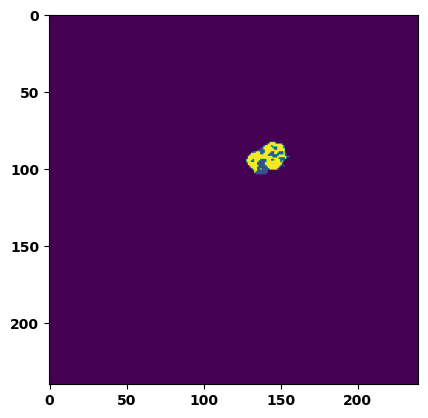

type:  HGG


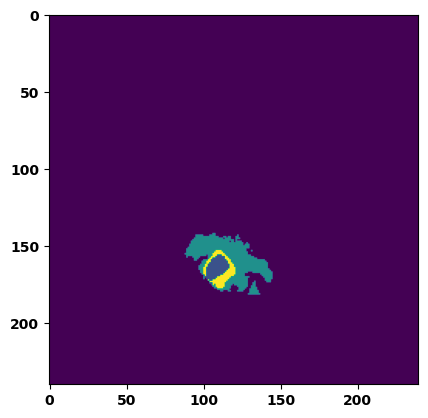

type:  HGG


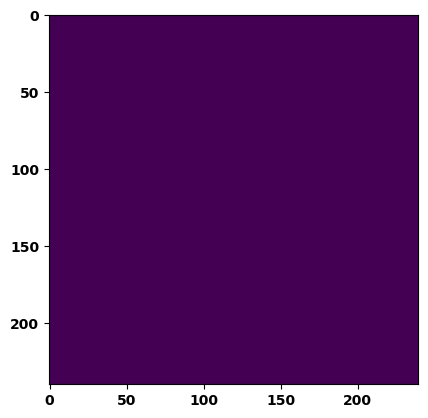

type:  HGG


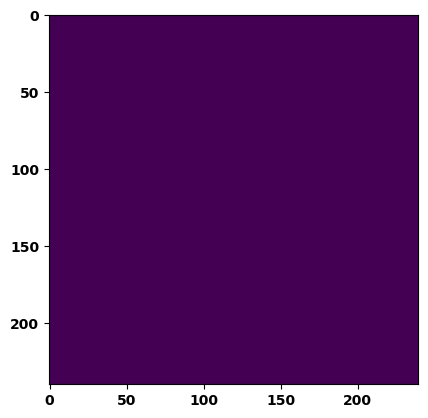

type:  HGG


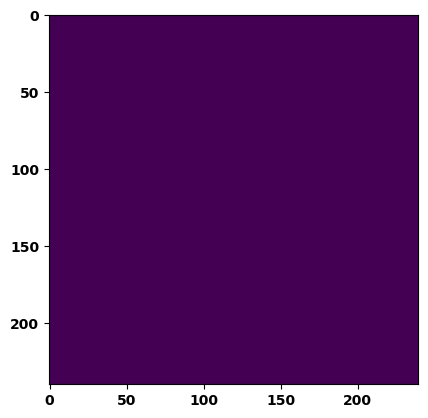

type:  HGG


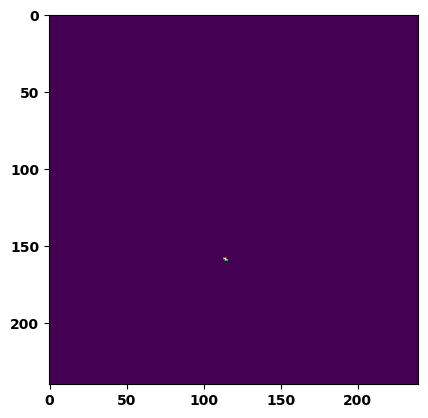

type:  HGG


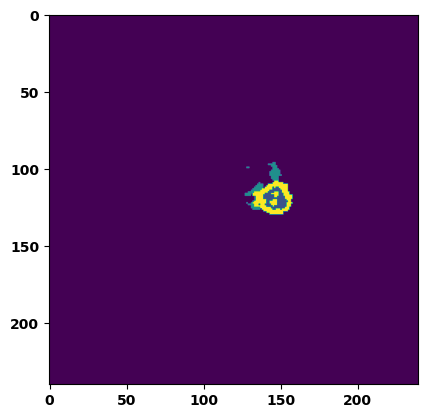

type:  HGG


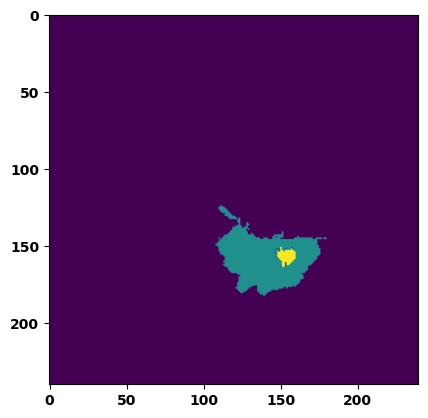

type:  HGG


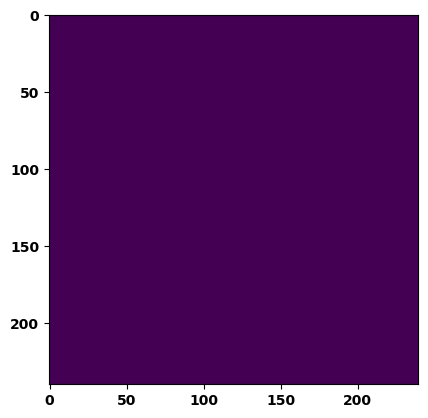

type:  HGG


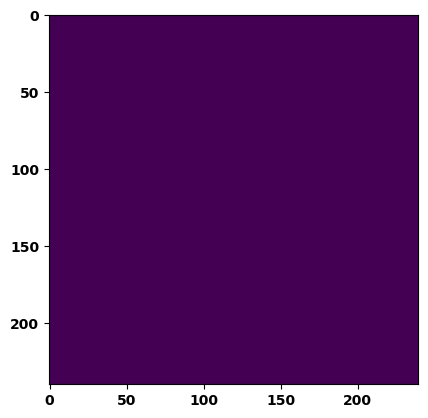

type:  HGG


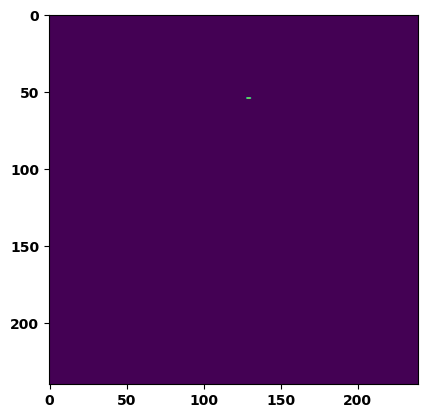

type:  HGG


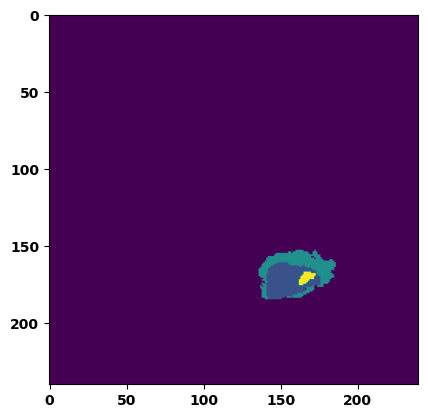

type:  HGG


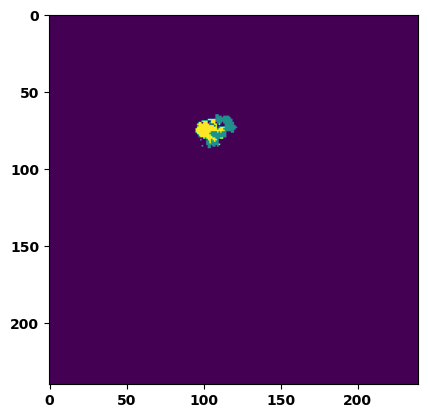

type:  HGG


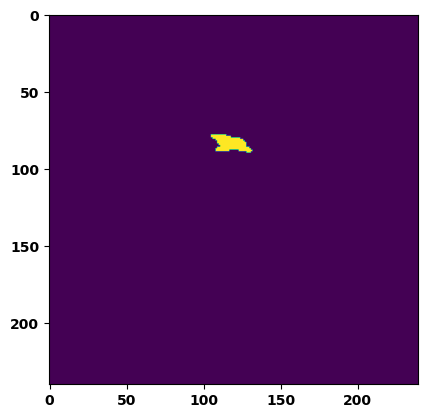

type:  HGG


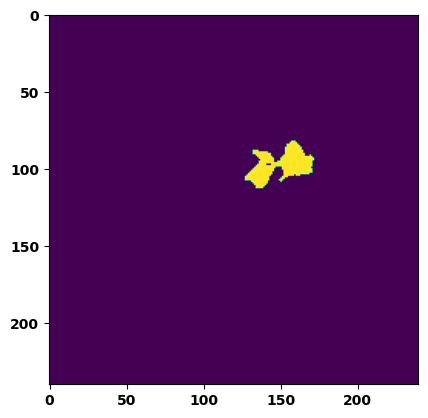

type:  HGG


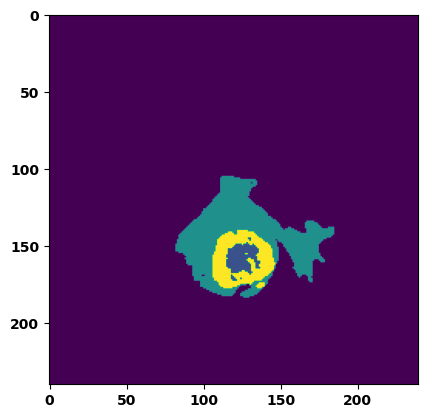

type:  HGG


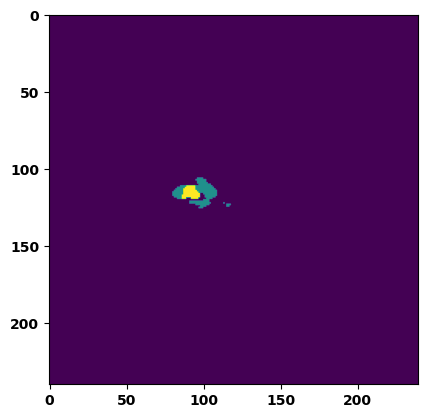

KeyboardInterrupt: 

In [4]:
source = pd.read_csv(CSV_FILE)
start=torch.load('data/slice_starts.pt')
print(len(source))
for i in range(len(source)):
    image_cat=source.iloc[i,0]
    image_id=source.iloc[i,1]
    mask = get_image(IMAGE_PATH,image_cat,image_id,'seg')
    img = get_image(IMAGE_PATH,image_cat,image_id,'t1')
    print("type: ",image_cat)
    figure()
    imshow(mask[:,:,start[i].int()])
    show()

    

In [5]:
gc.collect()
torch.cuda.empty_cache()

type:  HGG
index:  0 slice starts at:  103


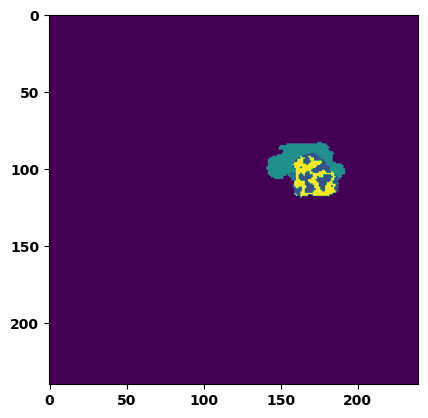

type:  HGG
index:  1 slice starts at:  69


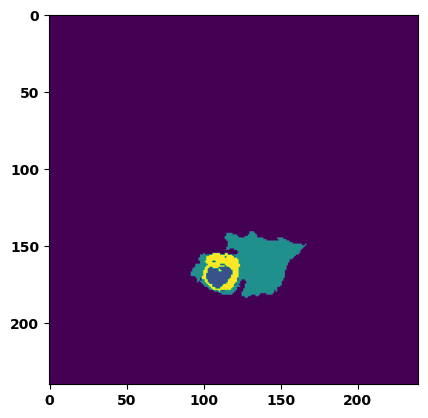

type:  HGG
index:  2 slice starts at:  53


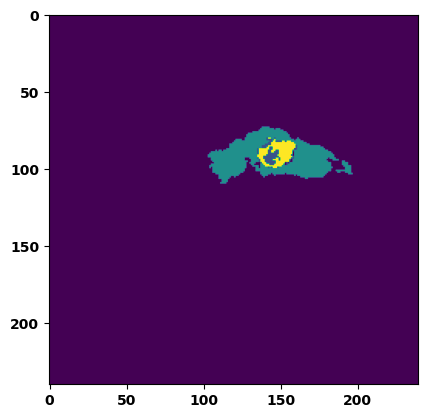

type:  HGG
index:  3 slice starts at:  114


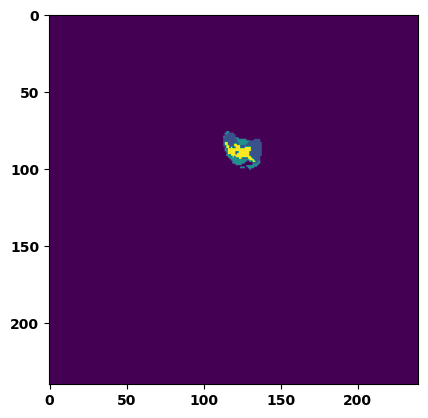

type:  HGG
index:  4 slice starts at:  68


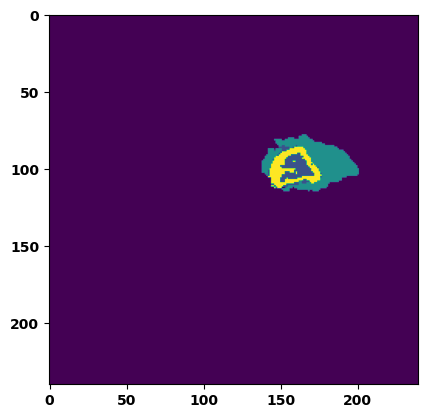

type:  HGG
index:  5 slice starts at:  97


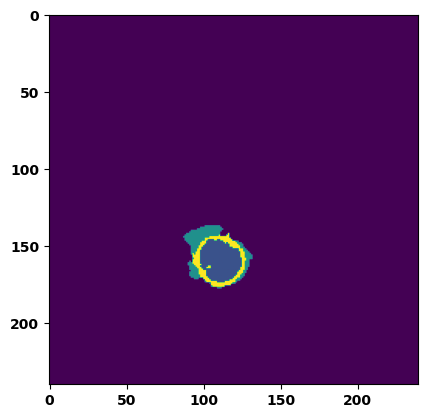

type:  HGG
index:  6 slice starts at:  72


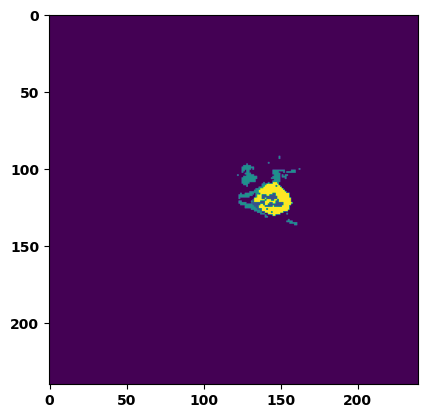

type:  HGG
index:  7 slice starts at:  65


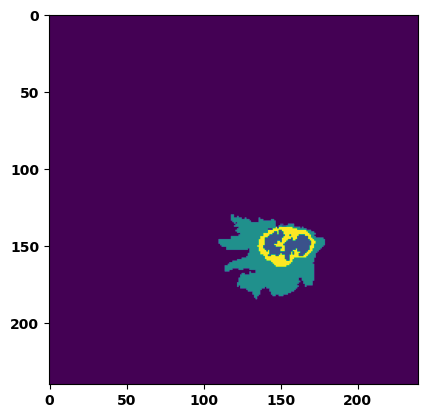

type:  HGG
index:  8 slice starts at:  55


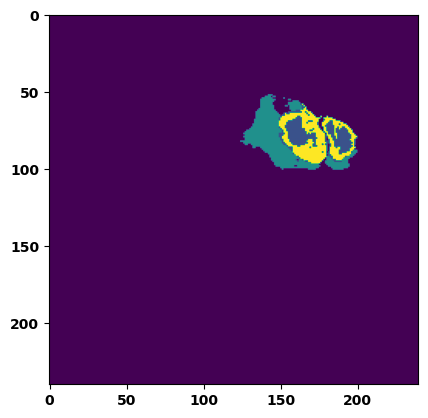

type:  HGG
index:  9 slice starts at:  100


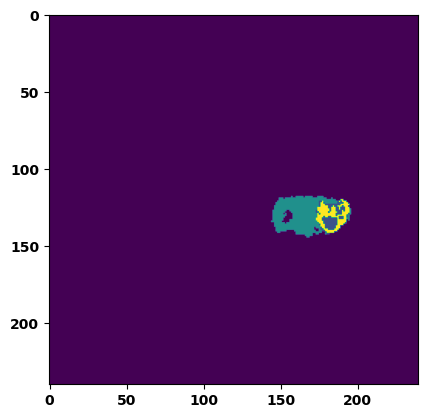

type:  HGG
index:  10 slice starts at:  55


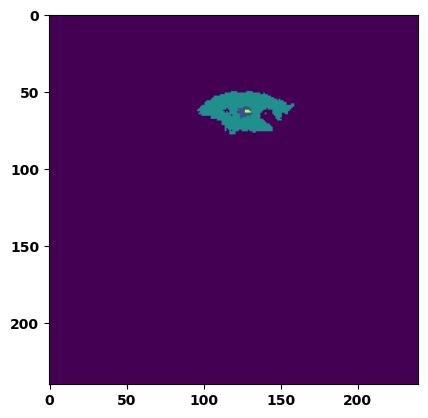

type:  HGG
index:  11 slice starts at:  70


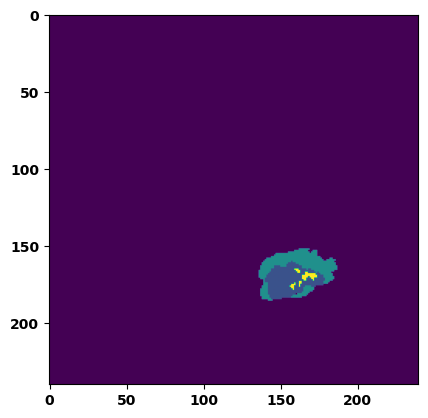

type:  HGG
index:  12 slice starts at:  71


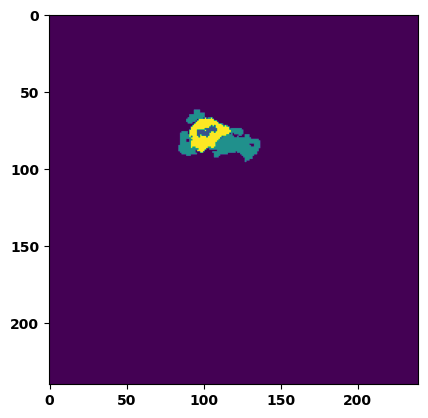

type:  HGG
index:  13 slice starts at:  50


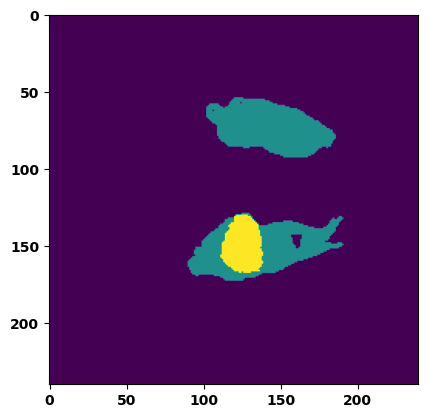

type:  HGG
index:  14 slice starts at:  80


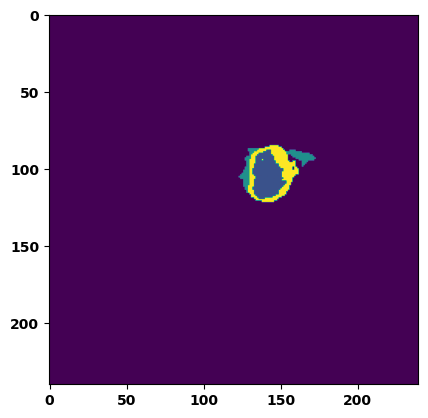

type:  HGG
index:  15 slice starts at:  92


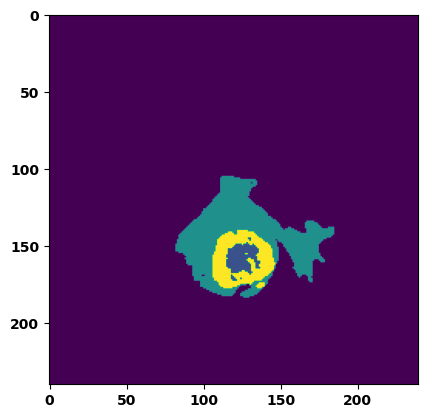

type:  HGG
index:  16 slice starts at:  92


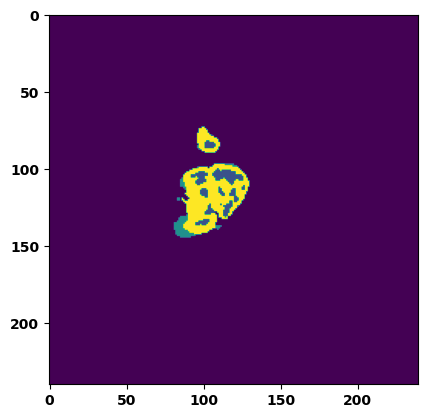

type:  HGG
index:  17 slice starts at:  67


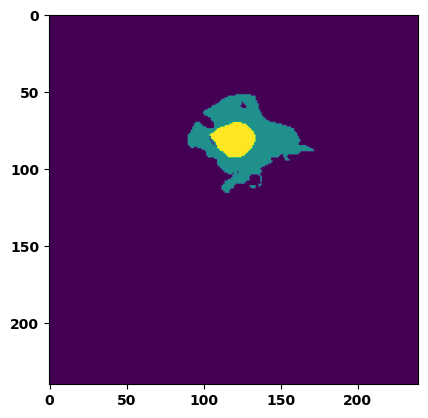

type:  HGG
index:  18 slice starts at:  55


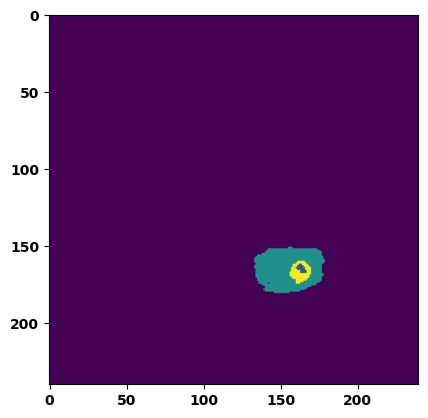

type:  HGG
index:  19 slice starts at:  93


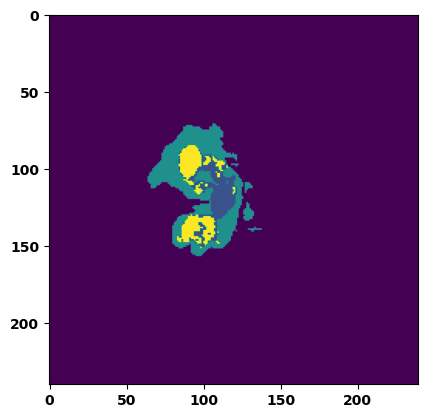

type:  HGG
index:  20 slice starts at:  84


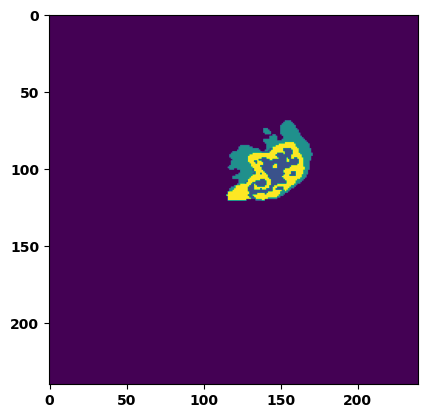

type:  HGG
index:  21 slice starts at:  73


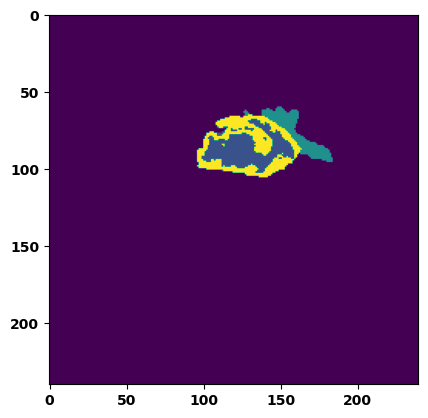

type:  HGG
index:  22 slice starts at:  92


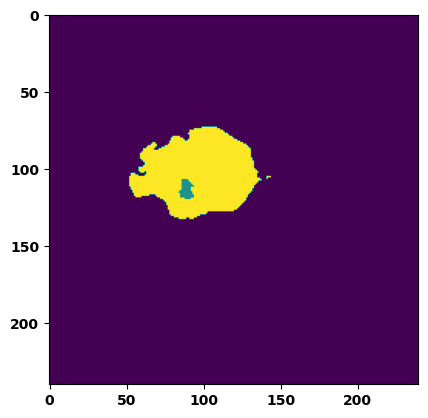

type:  HGG
index:  23 slice starts at:  49


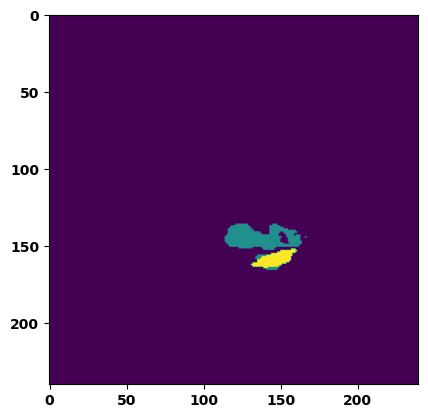

type:  HGG
index:  24 slice starts at:  83


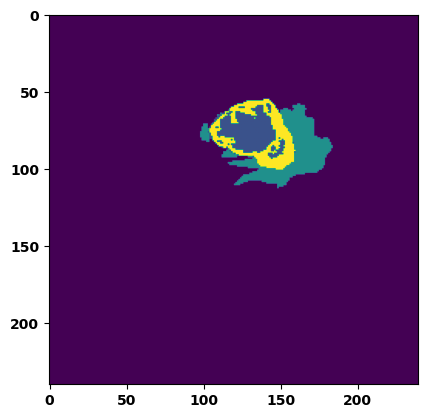

type:  HGG
index:  25 slice starts at:  50


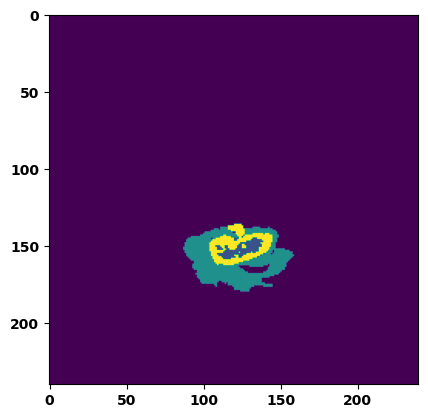

type:  HGG
index:  26 slice starts at:  98


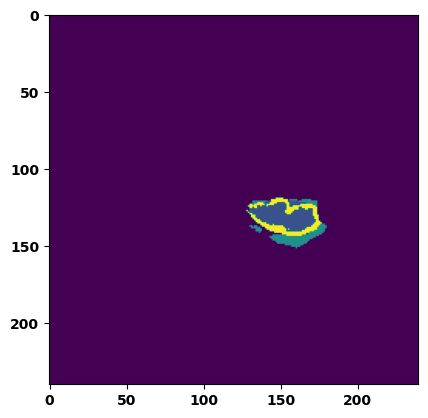

type:  HGG
index:  27 slice starts at:  68


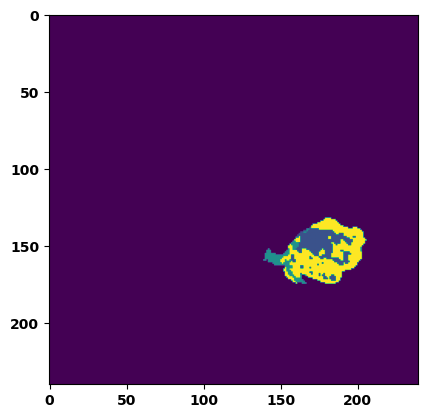

type:  HGG
index:  28 slice starts at:  64


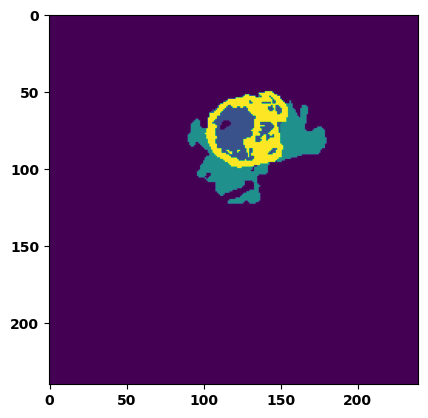

type:  HGG
index:  29 slice starts at:  50


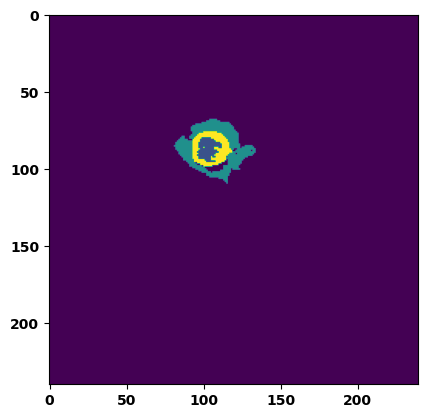

type:  HGG
index:  30 slice starts at:  93


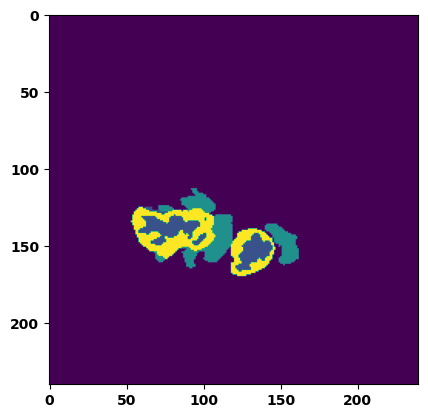

type:  HGG
index:  31 slice starts at:  85


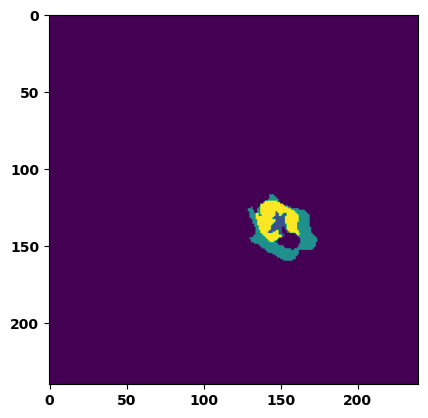

type:  HGG
index:  32 slice starts at:  50


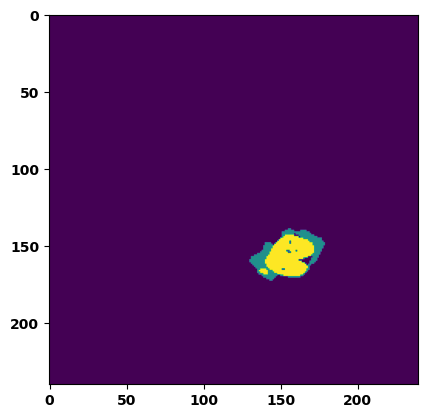

type:  HGG
index:  33 slice starts at:  74


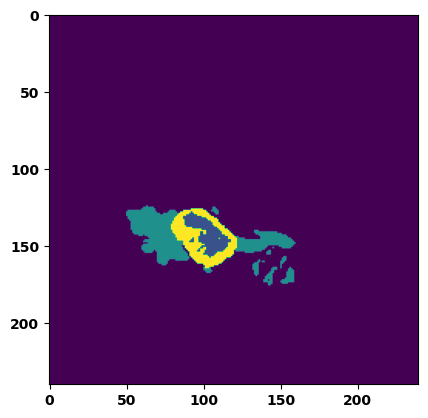

type:  HGG
index:  34 slice starts at:  115


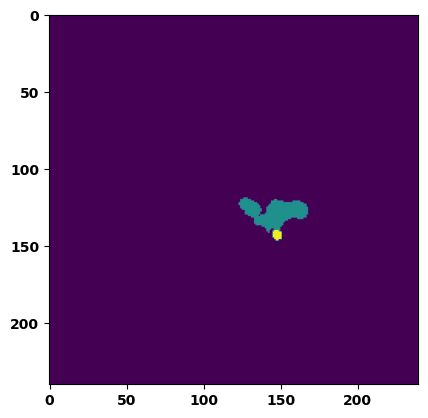

type:  HGG
index:  35 slice starts at:  59


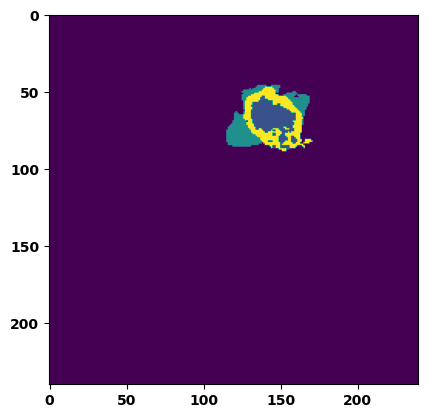

type:  HGG
index:  36 slice starts at:  69


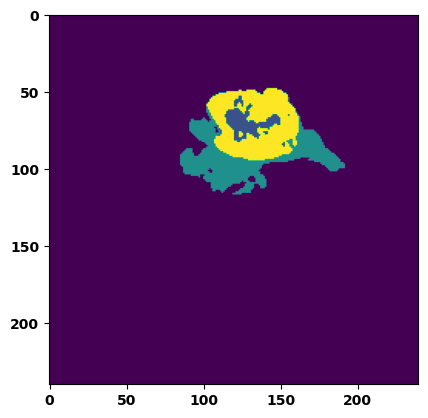

type:  HGG
index:  37 slice starts at:  71


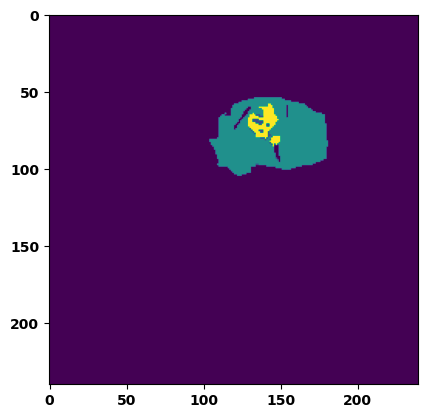

type:  HGG
index:  38 slice starts at:  99


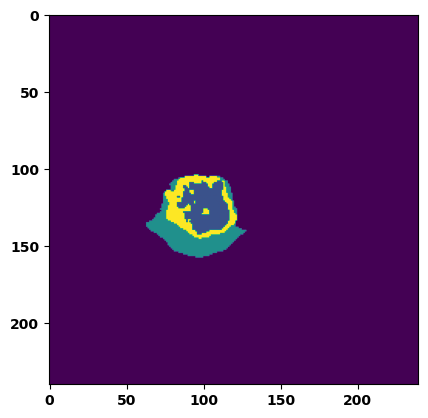

type:  HGG
index:  39 slice starts at:  101


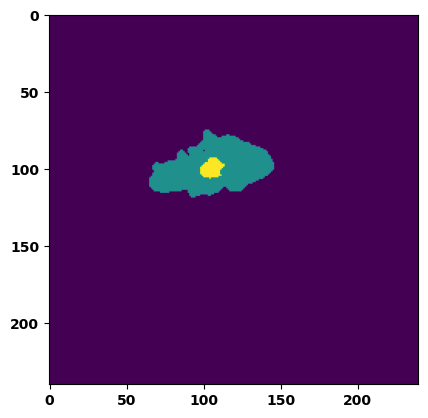

type:  HGG
index:  40 slice starts at:  67


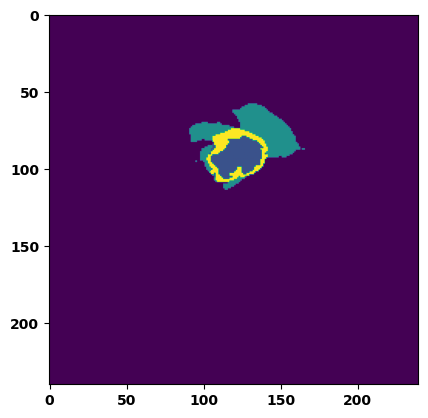

type:  HGG
index:  41 slice starts at:  68


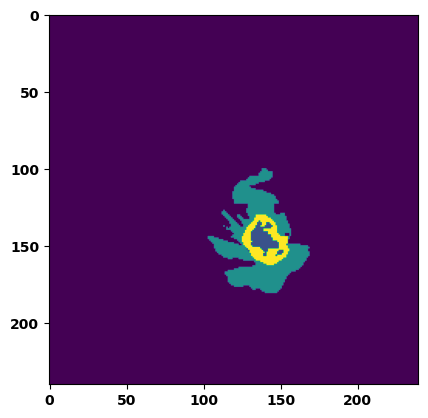

type:  HGG
index:  42 slice starts at:  85


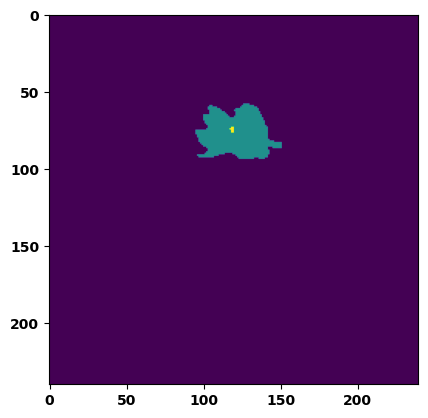

type:  HGG
index:  43 slice starts at:  57


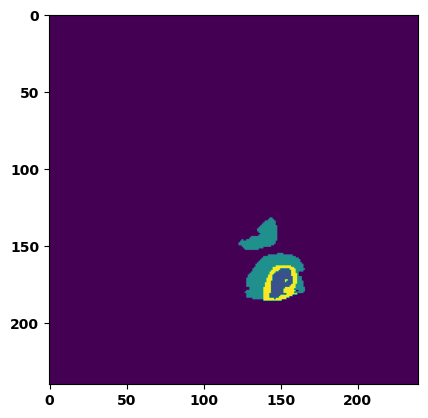

type:  HGG
index:  44 slice starts at:  103


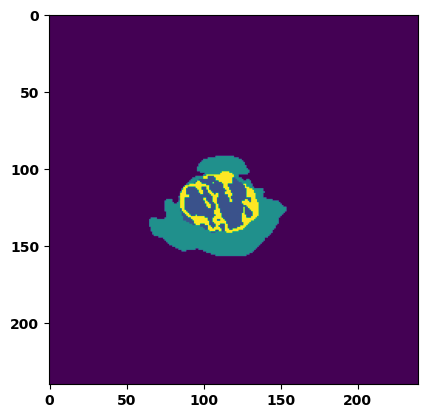

type:  HGG
index:  45 slice starts at:  86


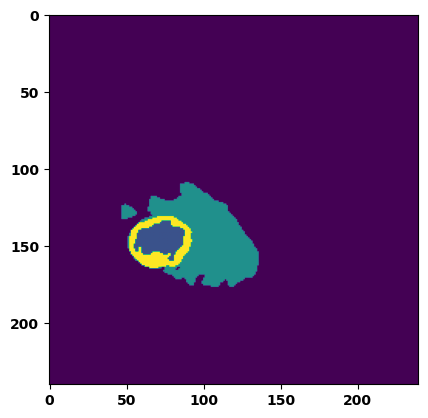

type:  HGG
index:  46 slice starts at:  84


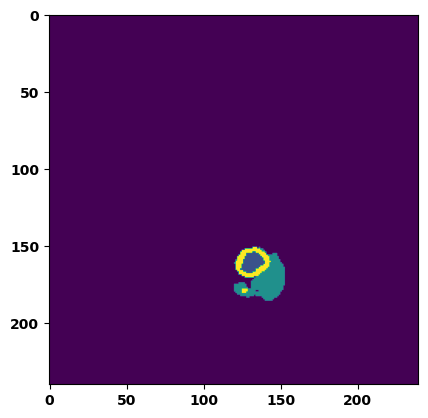

type:  HGG
index:  47 slice starts at:  68


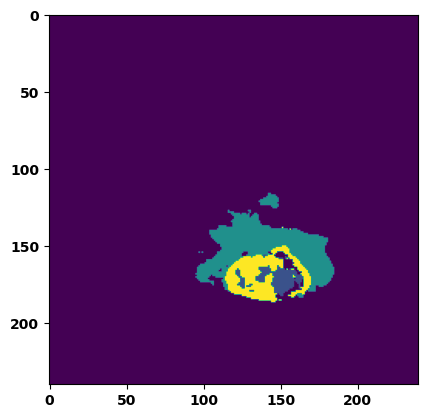

type:  HGG
index:  48 slice starts at:  75


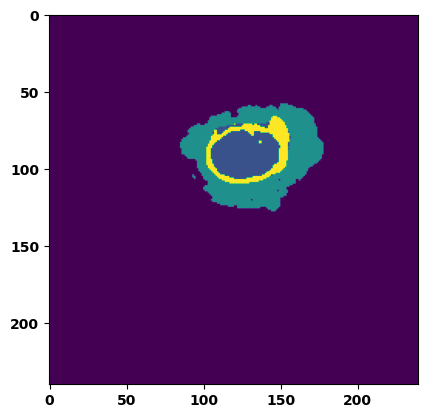

type:  HGG
index:  49 slice starts at:  92


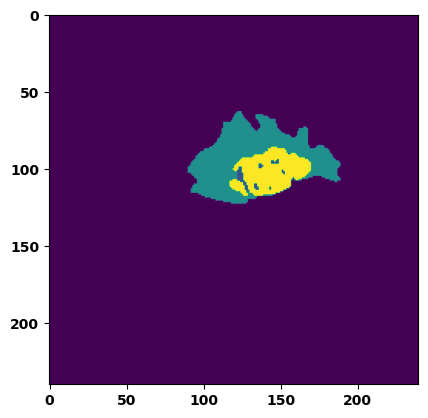

type:  HGG
index:  50 slice starts at:  89


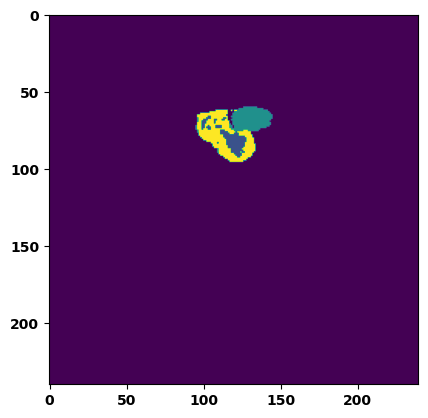

type:  HGG
index:  51 slice starts at:  63


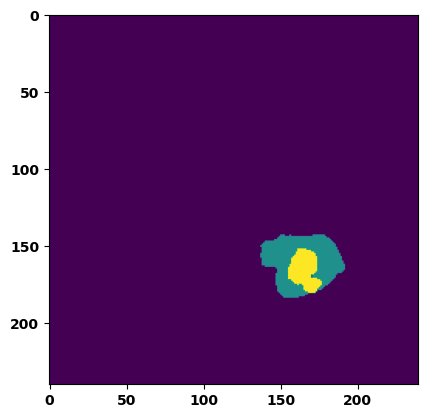

type:  HGG
index:  52 slice starts at:  86


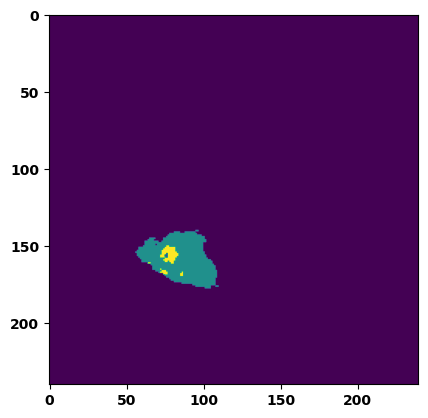

type:  HGG
index:  53 slice starts at:  59


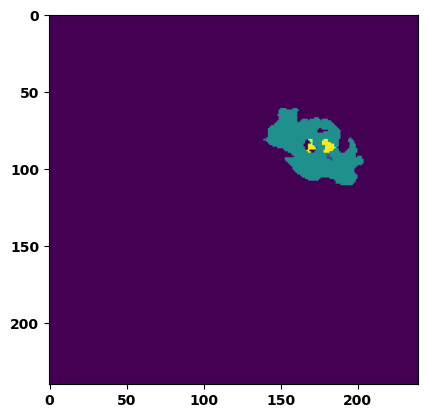

type:  HGG
index:  54 slice starts at:  63


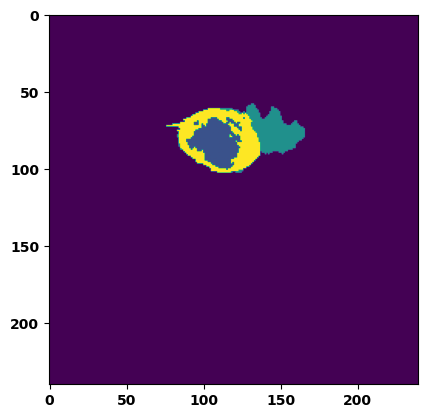

type:  HGG
index:  55 slice starts at:  104


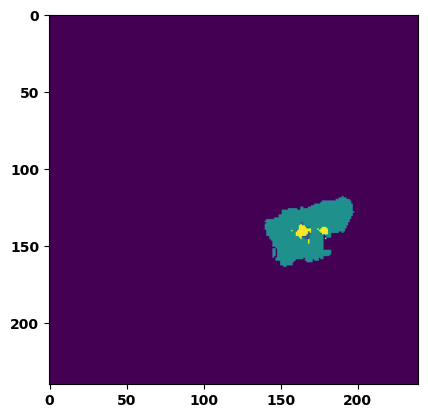

type:  HGG
index:  56 slice starts at:  85


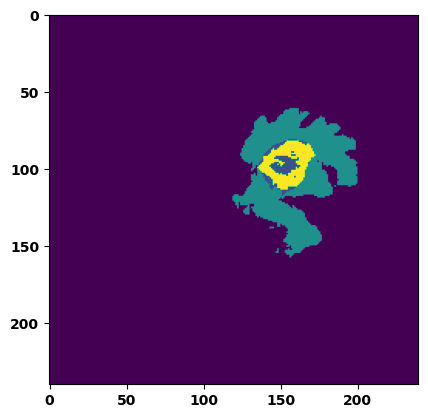

type:  HGG
index:  57 slice starts at:  95


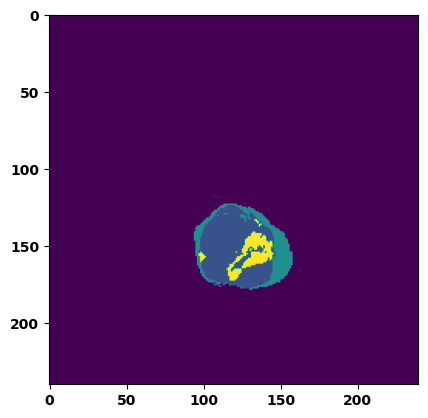

type:  HGG
index:  58 slice starts at:  100


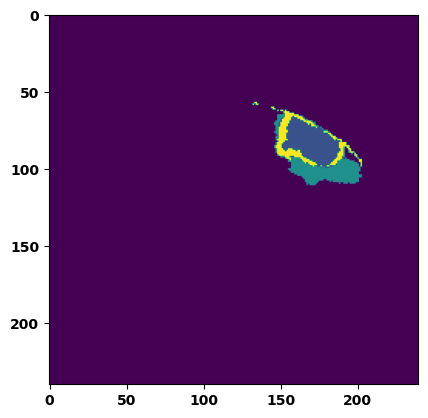

type:  HGG
index:  59 slice starts at:  90


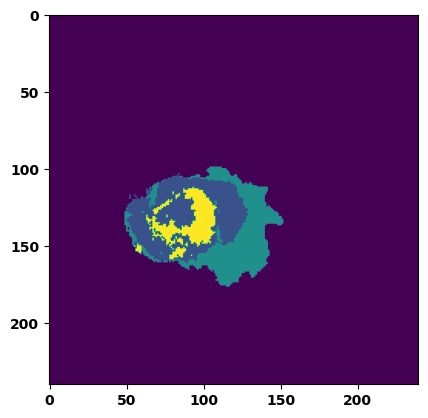

type:  HGG
index:  60 slice starts at:  101


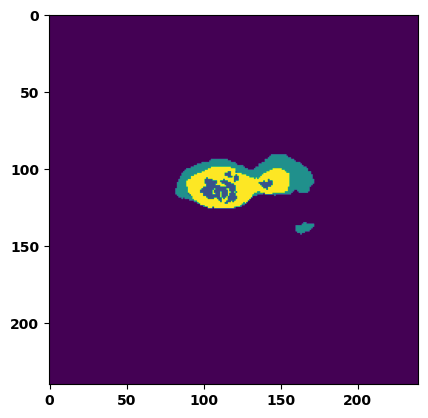

type:  HGG
index:  61 slice starts at:  65


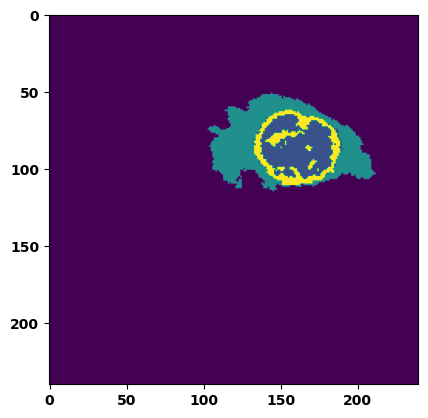

type:  HGG
index:  62 slice starts at:  86


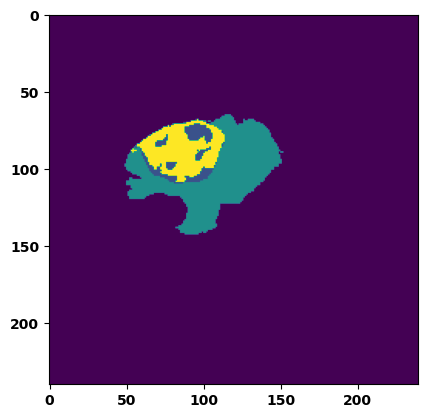

type:  HGG
index:  63 slice starts at:  89


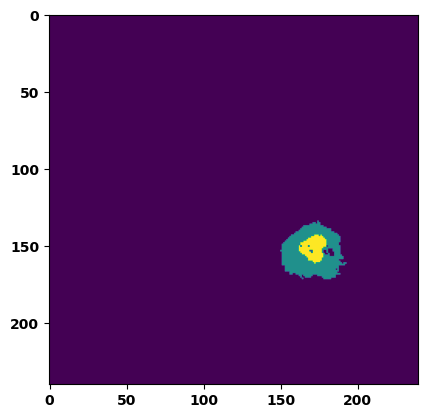

type:  HGG
index:  64 slice starts at:  111


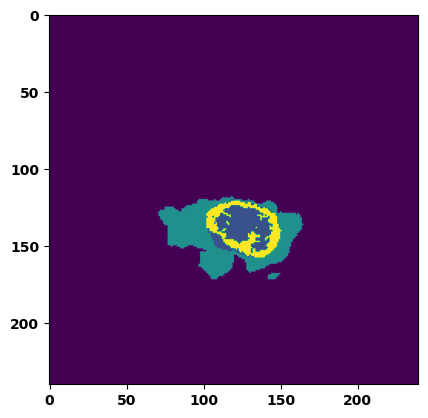

type:  HGG
index:  65 slice starts at:  104


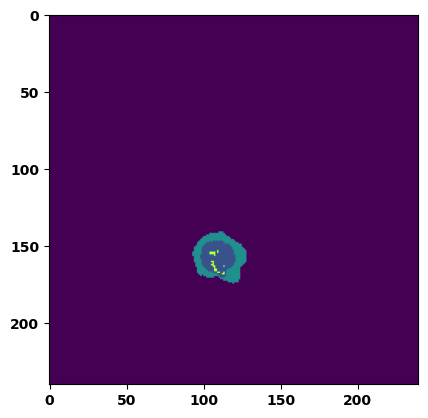

type:  HGG
index:  66 slice starts at:  107


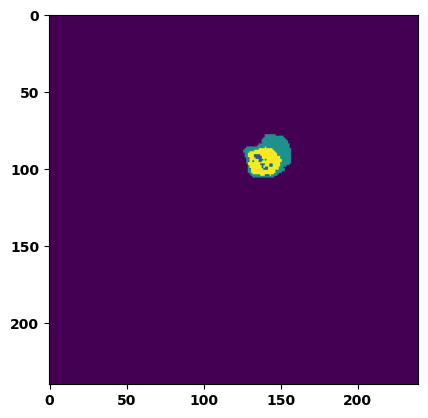

type:  HGG
index:  67 slice starts at:  78


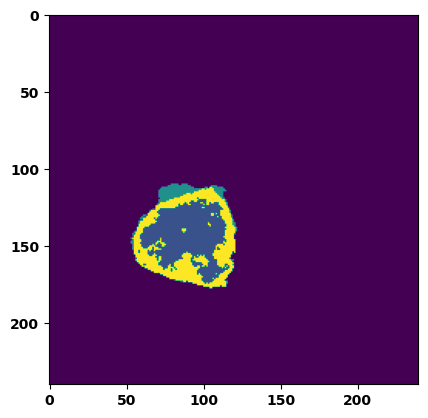

type:  HGG
index:  68 slice starts at:  91


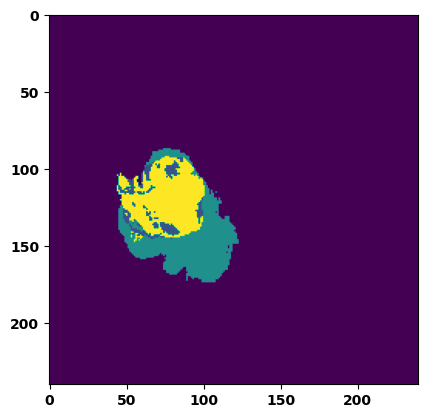

type:  HGG
index:  69 slice starts at:  59


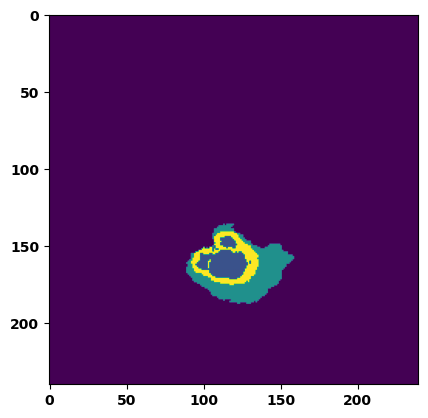

type:  HGG
index:  70 slice starts at:  67


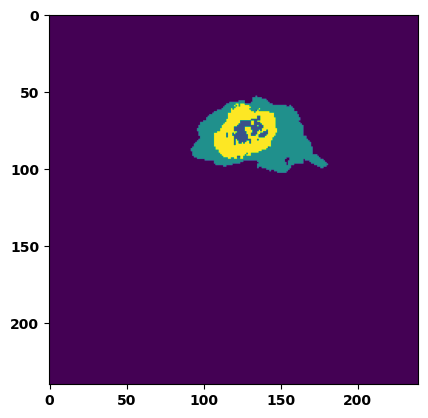

type:  HGG
index:  71 slice starts at:  74


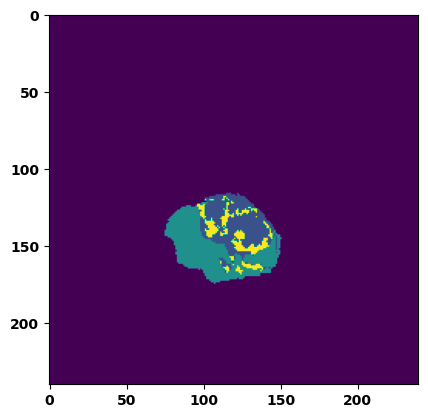

type:  HGG
index:  72 slice starts at:  60


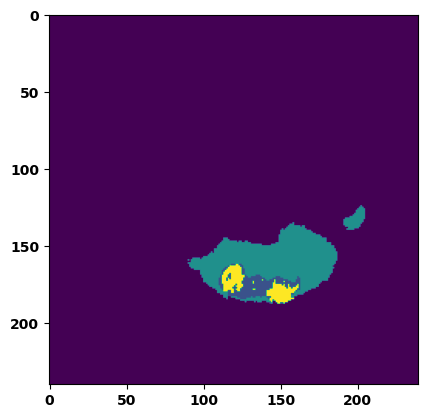

type:  HGG
index:  73 slice starts at:  65


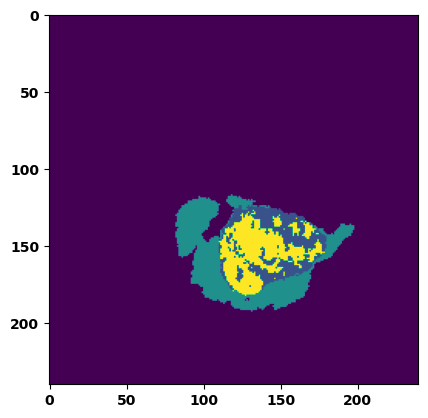

type:  HGG
index:  74 slice starts at:  75


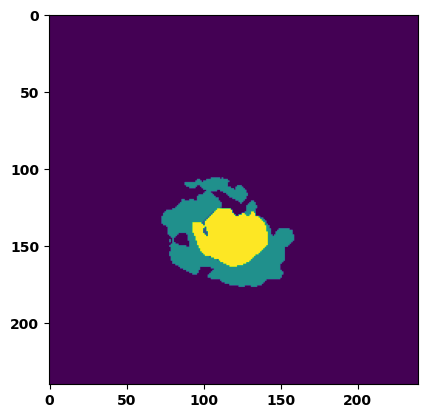

type:  HGG
index:  75 slice starts at:  87


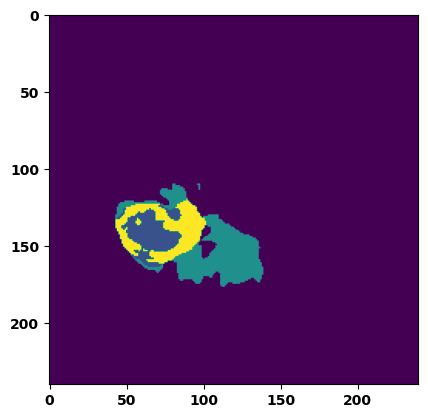

type:  HGG
index:  76 slice starts at:  95


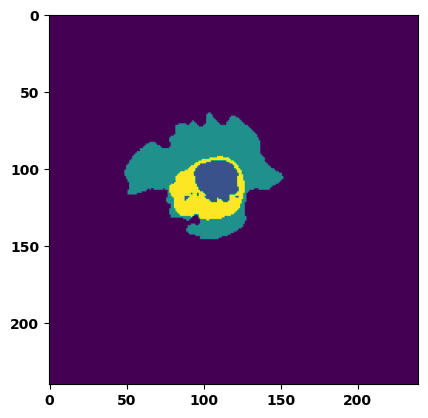

type:  HGG
index:  77 slice starts at:  63


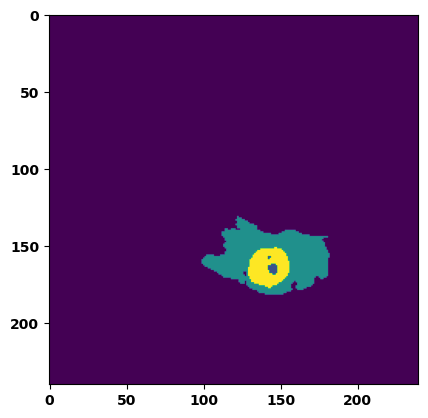

type:  HGG
index:  78 slice starts at:  106


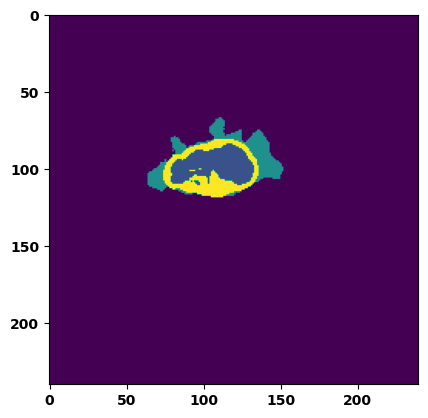

type:  HGG
index:  79 slice starts at:  63


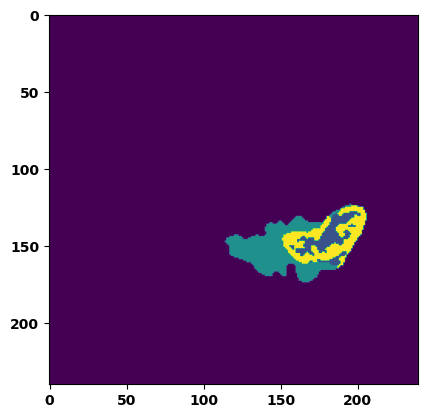

type:  HGG
index:  80 slice starts at:  69


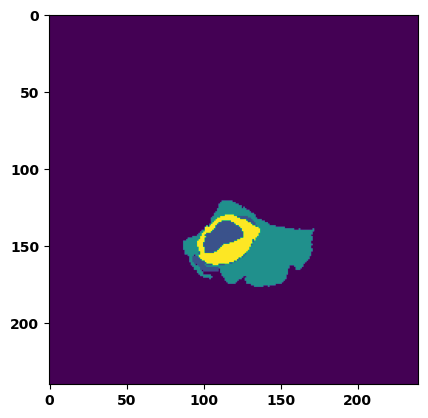

type:  HGG
index:  81 slice starts at:  97


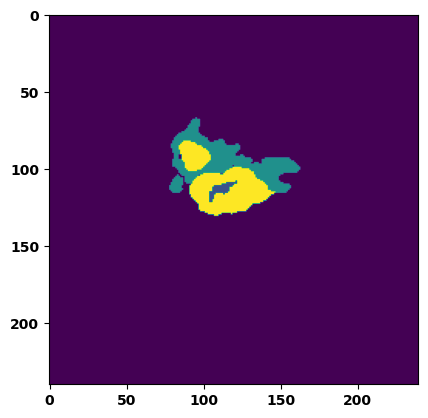

type:  HGG
index:  82 slice starts at:  45


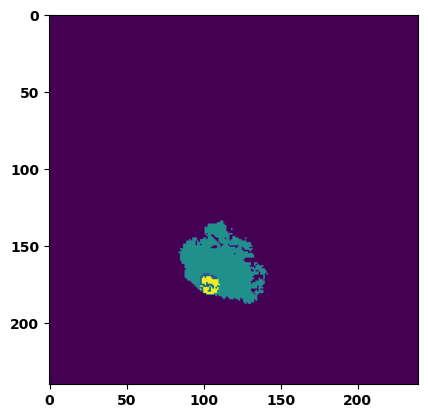

type:  HGG
index:  83 slice starts at:  91


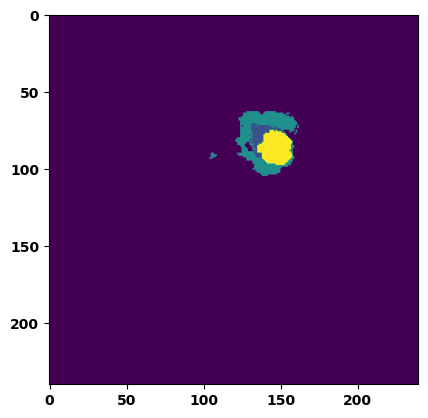

type:  HGG
index:  84 slice starts at:  89


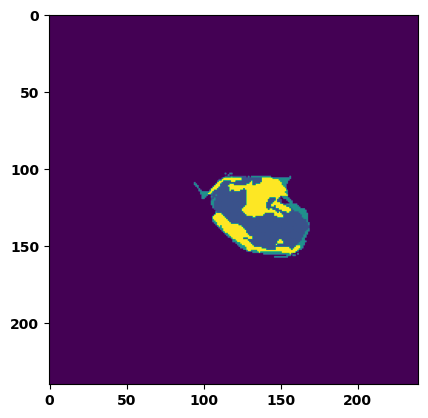

type:  HGG
index:  85 slice starts at:  90


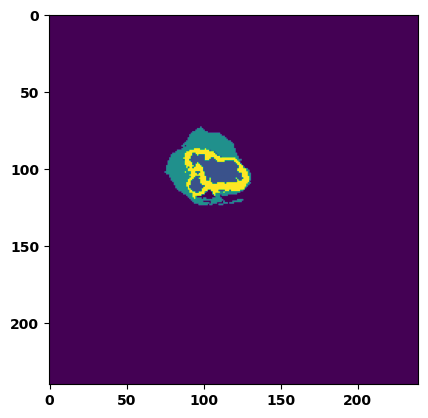

type:  HGG
index:  86 slice starts at:  85


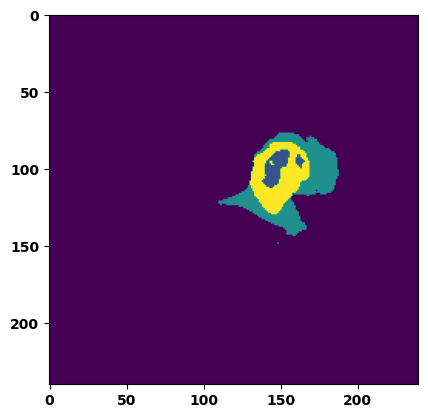

type:  HGG
index:  87 slice starts at:  89


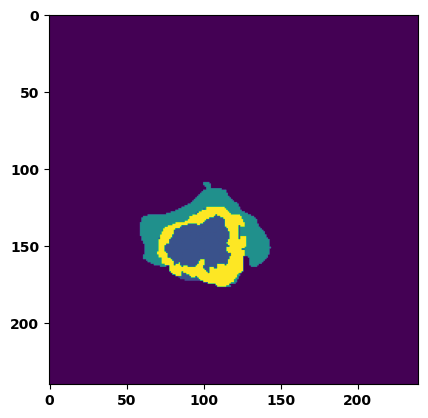

type:  HGG
index:  88 slice starts at:  94


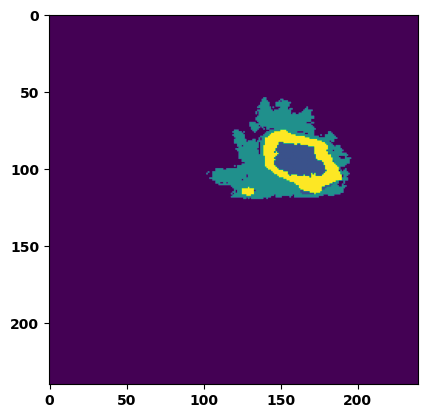

type:  HGG
index:  89 slice starts at:  61


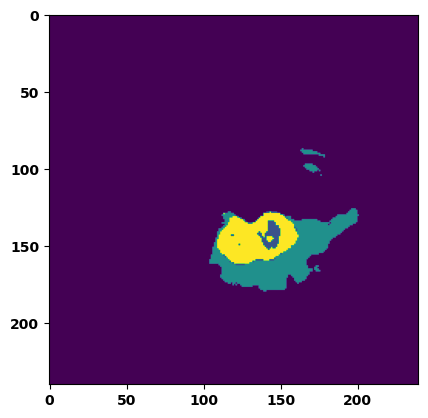

type:  HGG
index:  90 slice starts at:  78


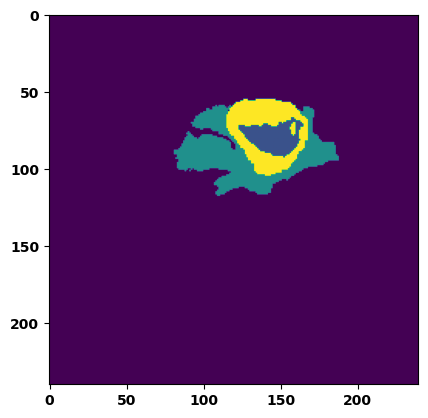

type:  HGG
index:  91 slice starts at:  67


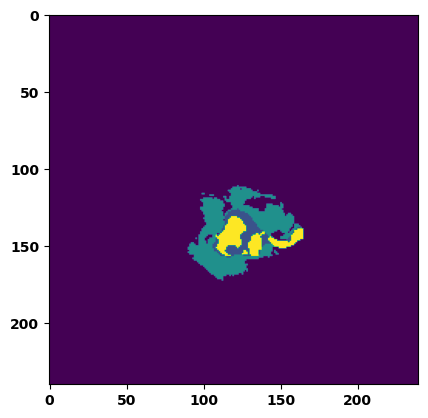

type:  HGG
index:  92 slice starts at:  95


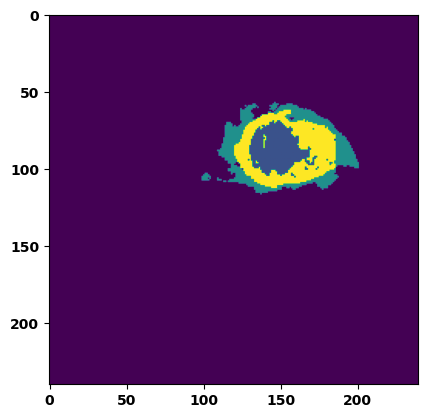

type:  HGG
index:  93 slice starts at:  49


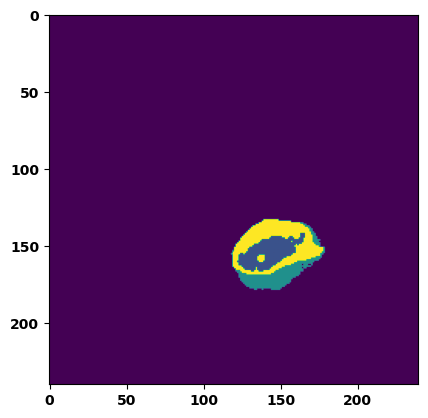

type:  HGG
index:  94 slice starts at:  57


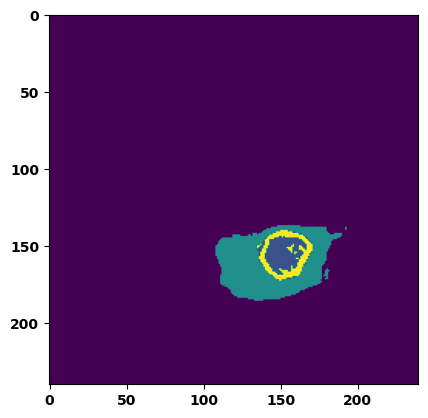

type:  HGG
index:  95 slice starts at:  92


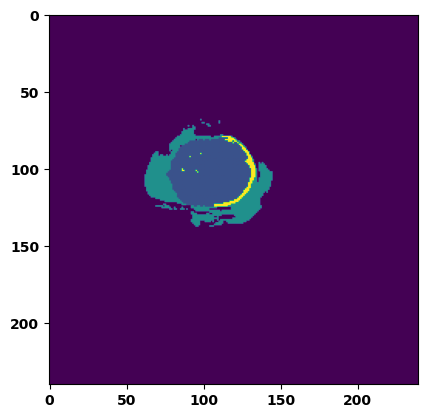

type:  HGG
index:  96 slice starts at:  101


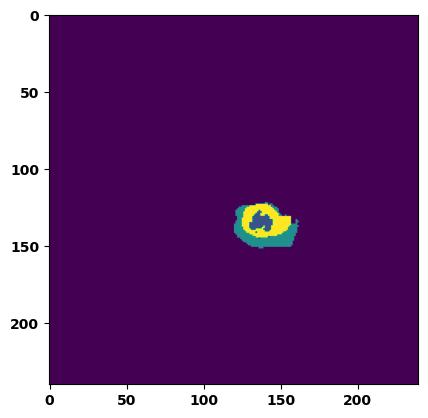

type:  HGG
index:  97 slice starts at:  85


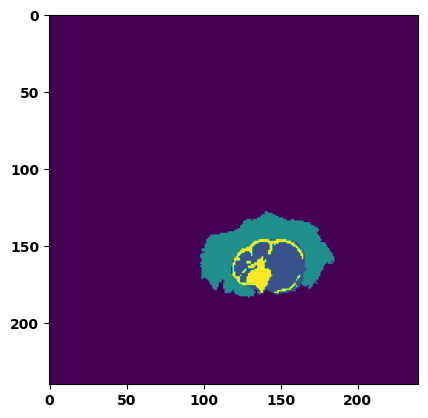

type:  HGG
index:  98 slice starts at:  90


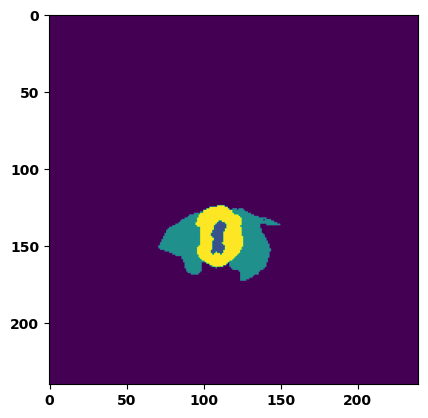

type:  HGG
index:  99 slice starts at:  73


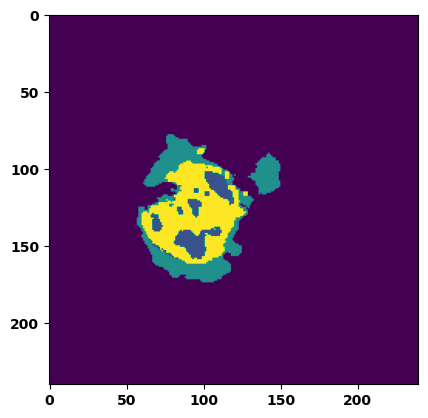

type:  HGG
index:  100 slice starts at:  107


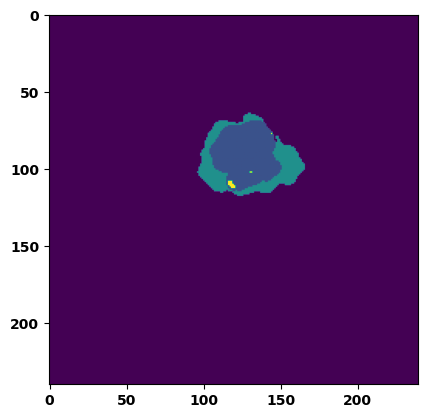

type:  HGG
index:  101 slice starts at:  56


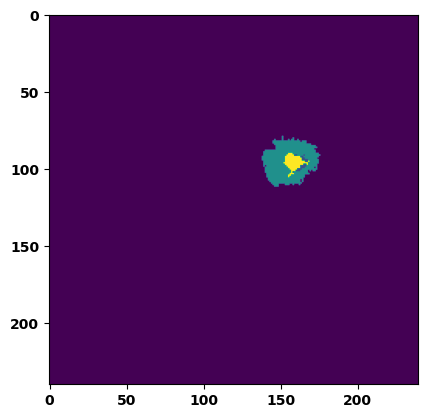

type:  HGG
index:  102 slice starts at:  87


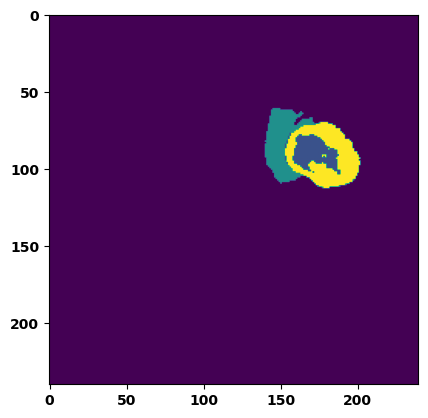

type:  HGG
index:  103 slice starts at:  66


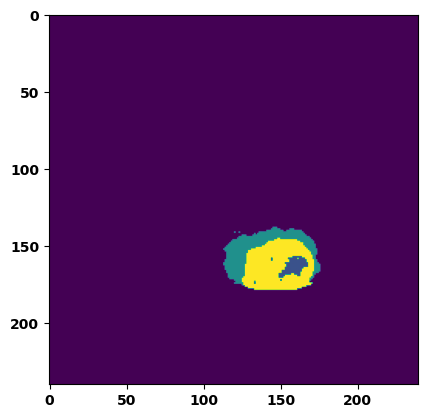

type:  HGG
index:  104 slice starts at:  56


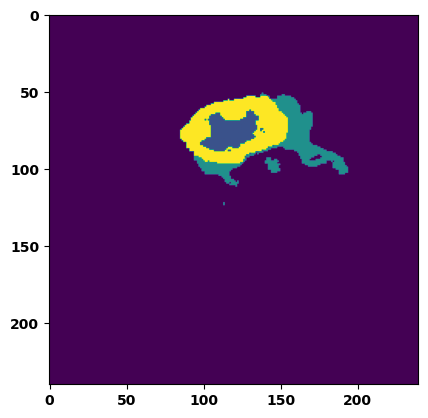

type:  HGG
index:  105 slice starts at:  74


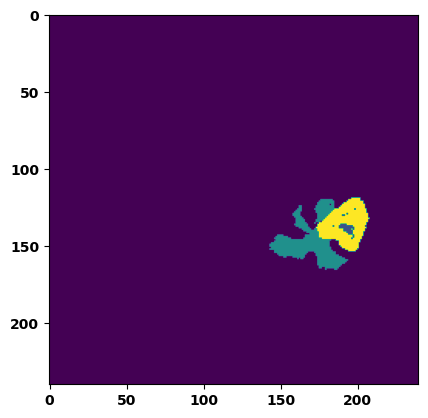

type:  HGG
index:  106 slice starts at:  89


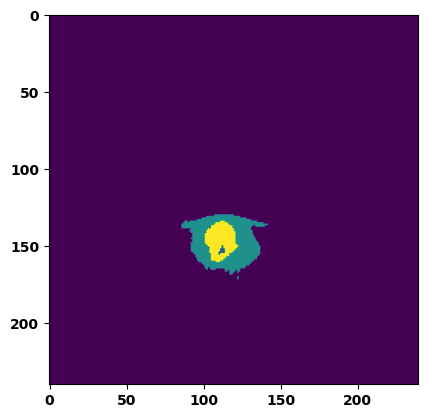

type:  HGG
index:  107 slice starts at:  68


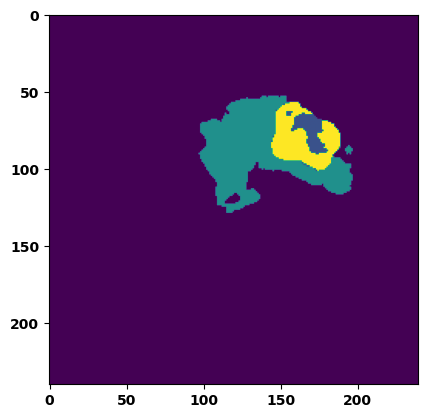

type:  HGG
index:  108 slice starts at:  65


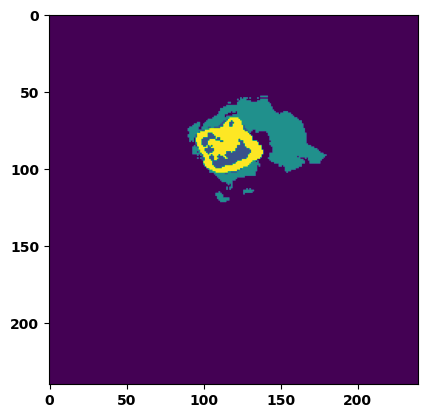

type:  HGG
index:  109 slice starts at:  48


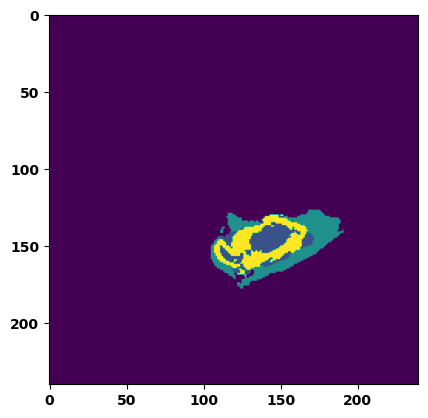

type:  HGG
index:  110 slice starts at:  77


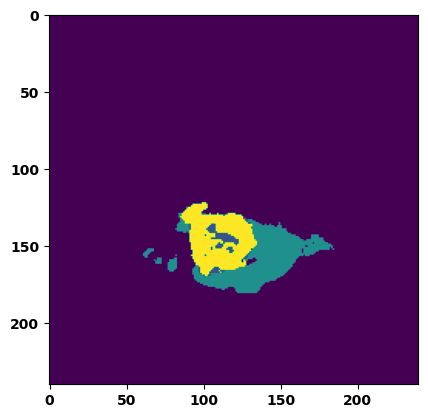

type:  HGG
index:  111 slice starts at:  94


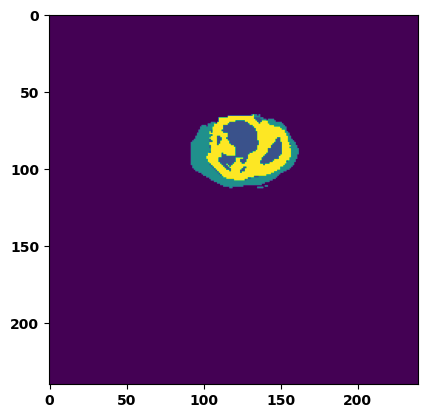

type:  HGG
index:  112 slice starts at:  70


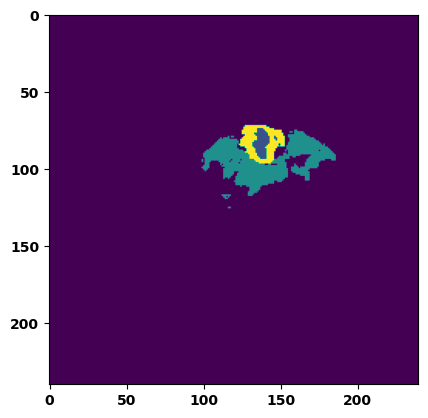

type:  HGG
index:  113 slice starts at:  107


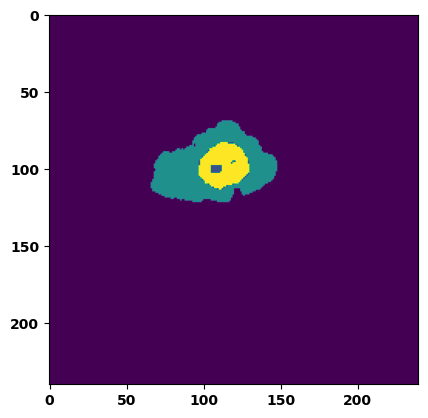

type:  HGG
index:  114 slice starts at:  71


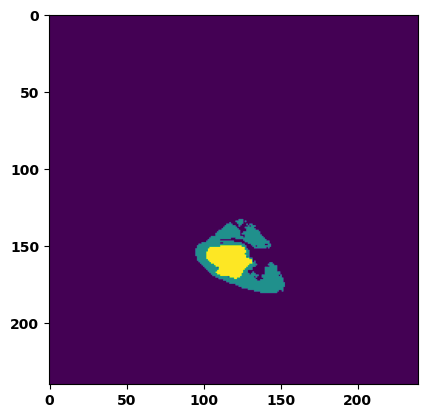

type:  HGG
index:  115 slice starts at:  84


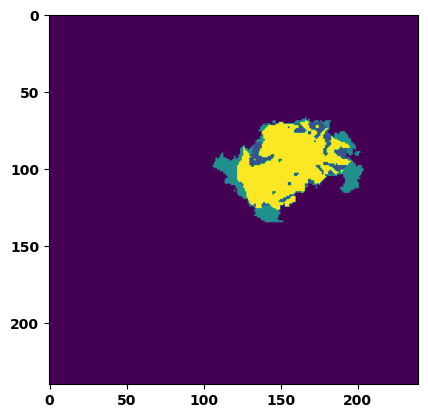

type:  HGG
index:  116 slice starts at:  90


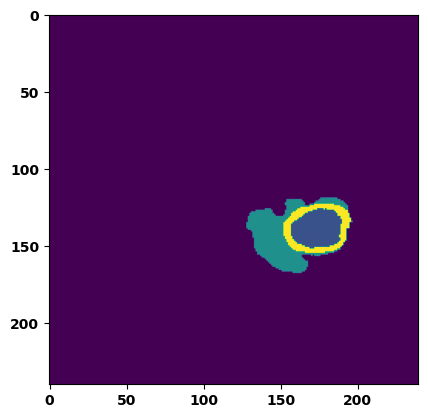

type:  HGG
index:  117 slice starts at:  89


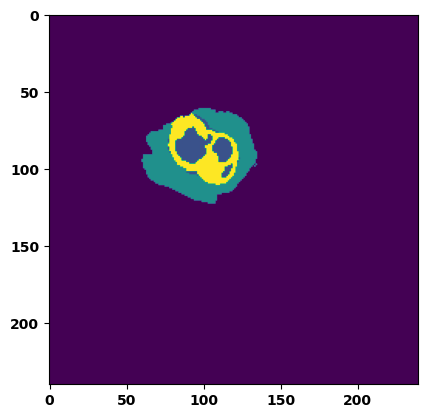

type:  HGG
index:  118 slice starts at:  63


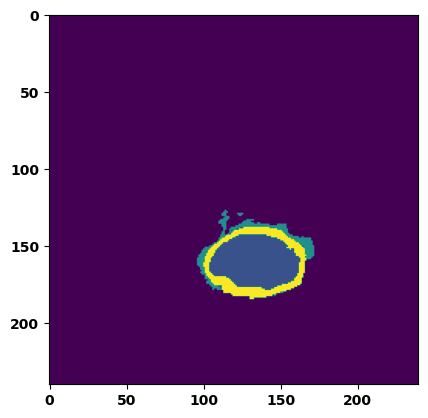

type:  HGG
index:  119 slice starts at:  44


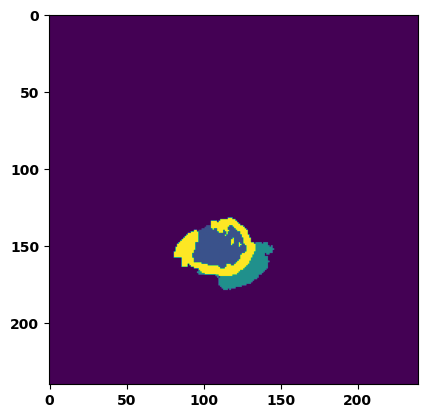

type:  HGG
index:  120 slice starts at:  73


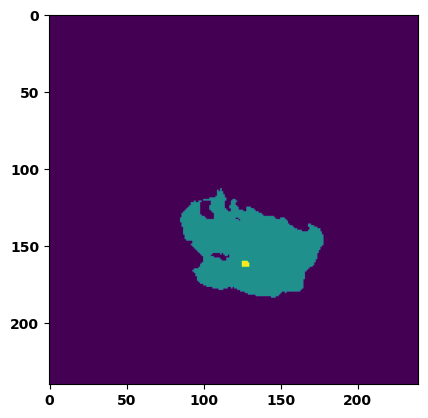

type:  HGG
index:  121 slice starts at:  84


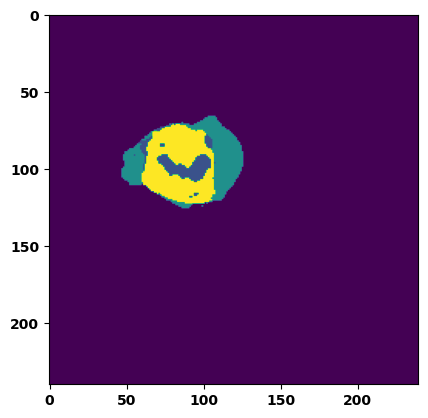

type:  HGG
index:  122 slice starts at:  64


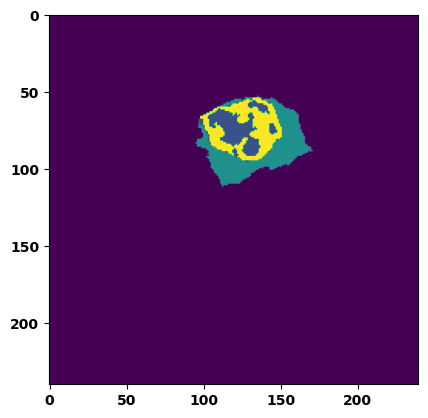

type:  HGG
index:  123 slice starts at:  97


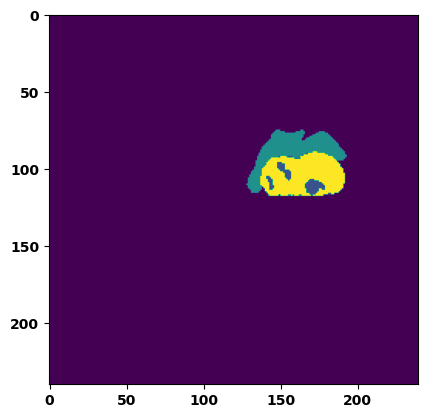

type:  HGG
index:  124 slice starts at:  50


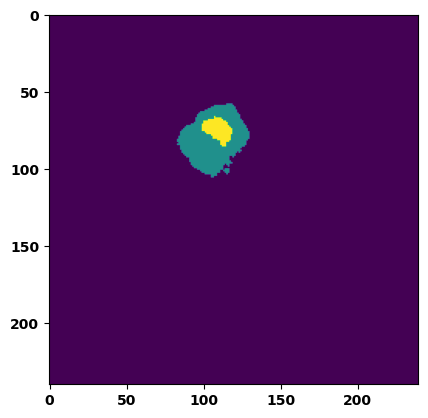

type:  HGG
index:  125 slice starts at:  83


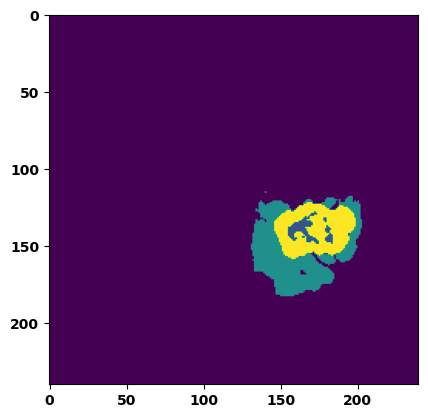

type:  HGG
index:  126 slice starts at:  62


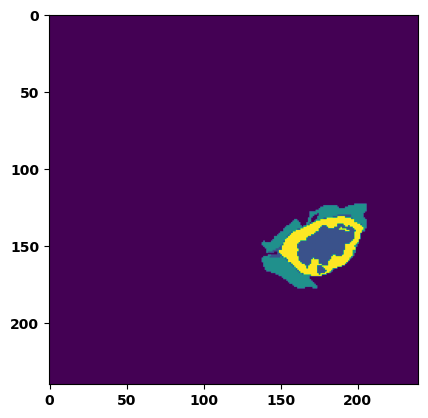

type:  HGG
index:  127 slice starts at:  71


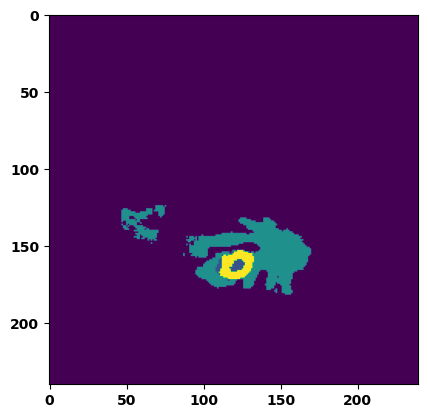

type:  HGG
index:  128 slice starts at:  58


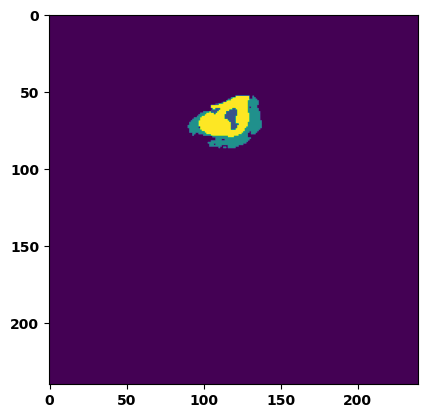

type:  HGG
index:  129 slice starts at:  92


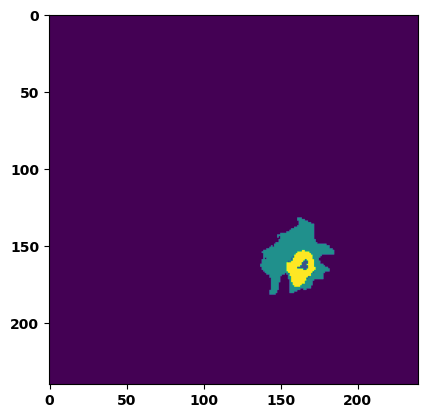

type:  HGG
index:  130 slice starts at:  65


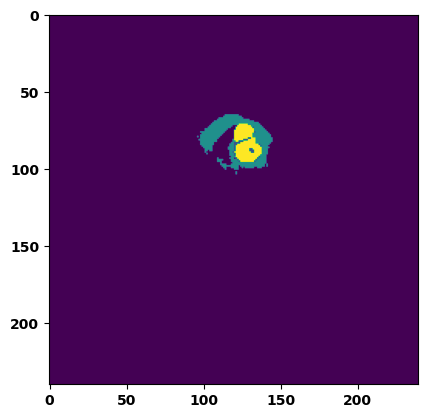

type:  HGG
index:  131 slice starts at:  96


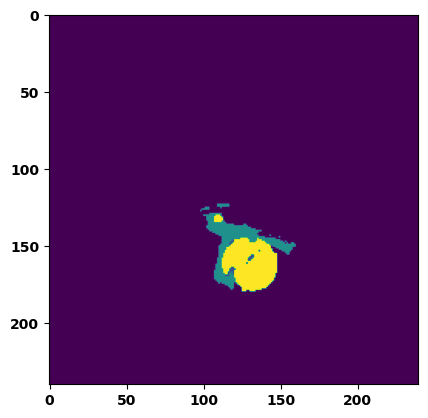

type:  HGG
index:  132 slice starts at:  88


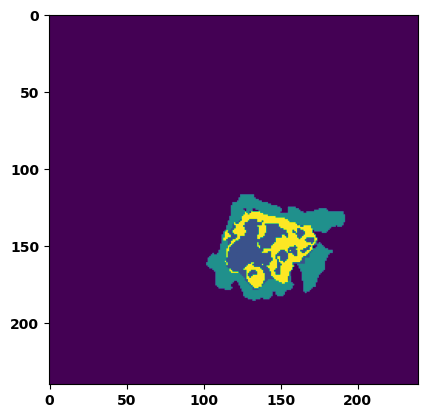

type:  HGG
index:  133 slice starts at:  56


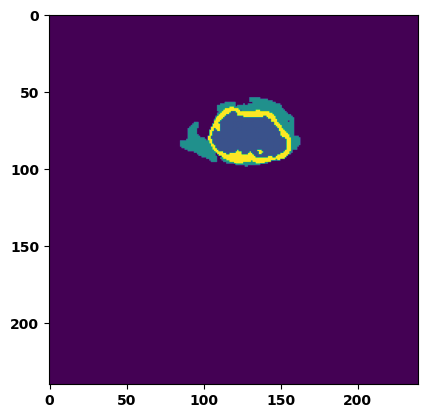

type:  HGG
index:  134 slice starts at:  89


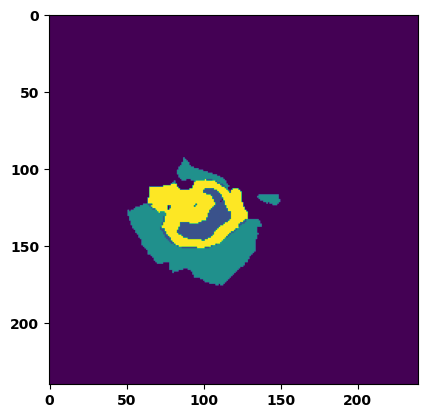

type:  HGG
index:  135 slice starts at:  55


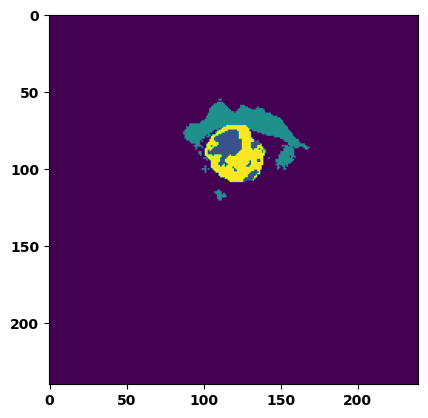

type:  HGG
index:  136 slice starts at:  102


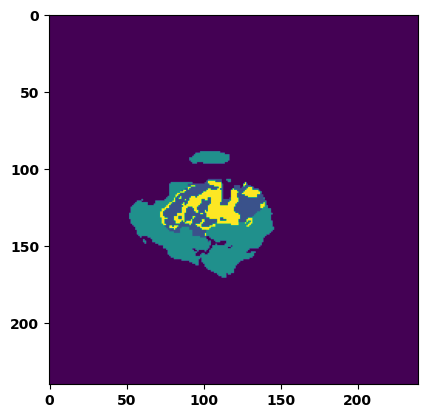

type:  HGG
index:  137 slice starts at:  52


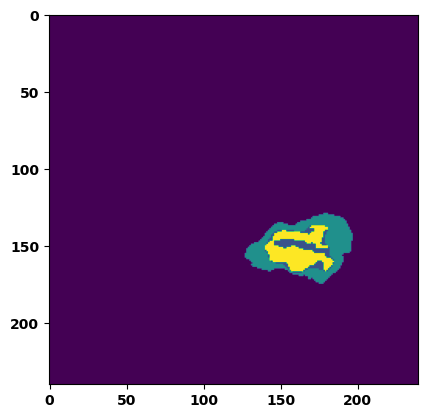

type:  HGG
index:  138 slice starts at:  70


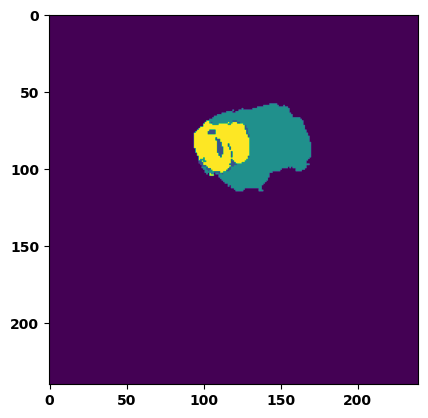

type:  HGG
index:  139 slice starts at:  61


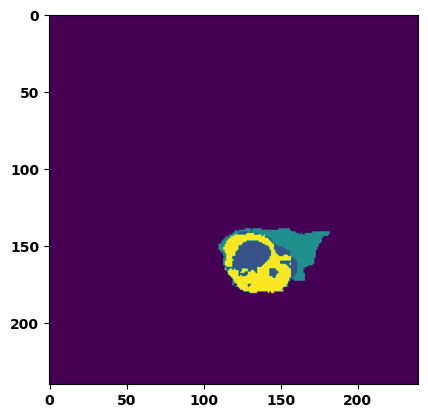

type:  HGG
index:  140 slice starts at:  83


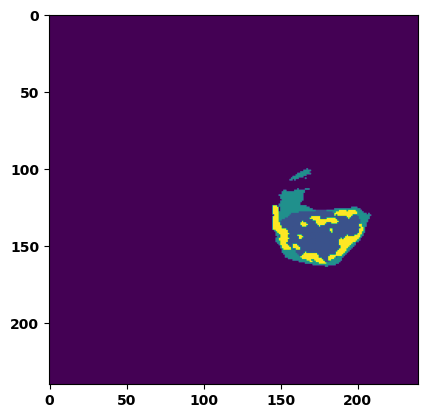

type:  HGG
index:  141 slice starts at:  51


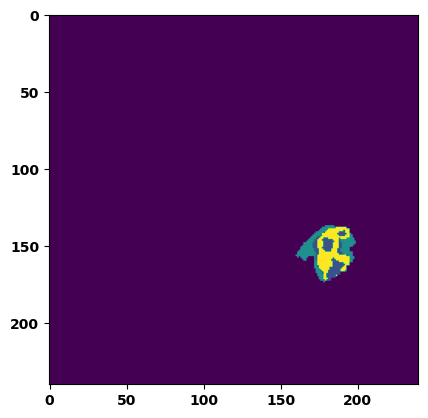

type:  HGG
index:  142 slice starts at:  65


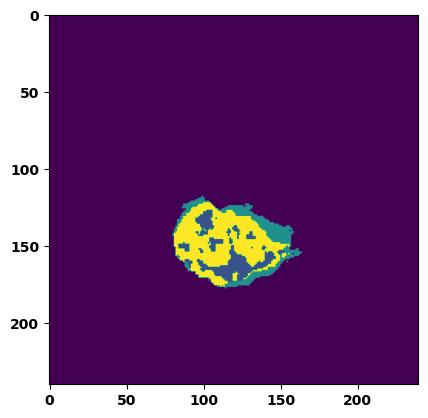

type:  HGG
index:  143 slice starts at:  72


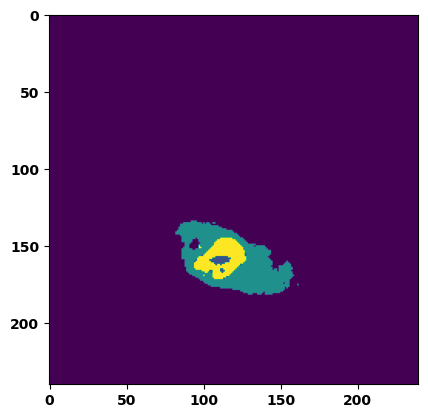

type:  HGG
index:  144 slice starts at:  92


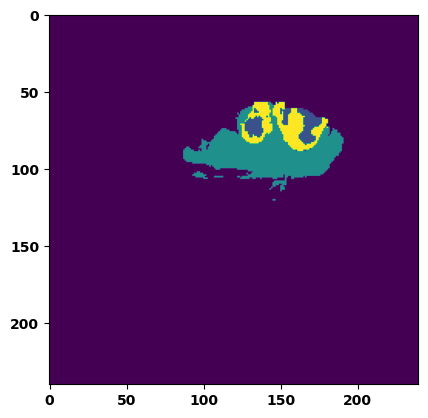

type:  HGG
index:  145 slice starts at:  70


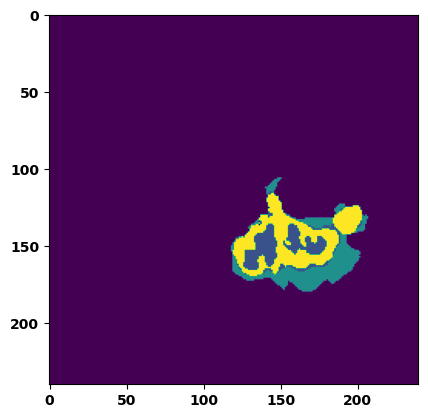

type:  HGG
index:  146 slice starts at:  107


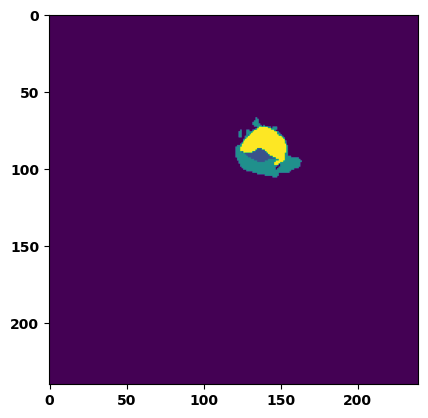

type:  HGG
index:  147 slice starts at:  90


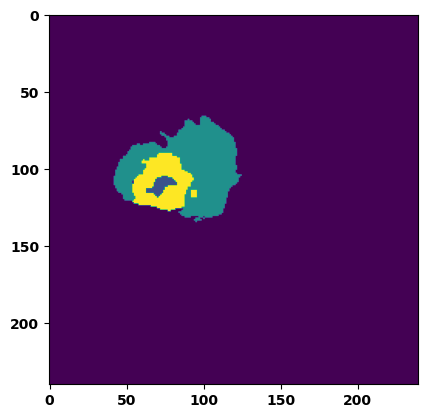

type:  HGG
index:  148 slice starts at:  79


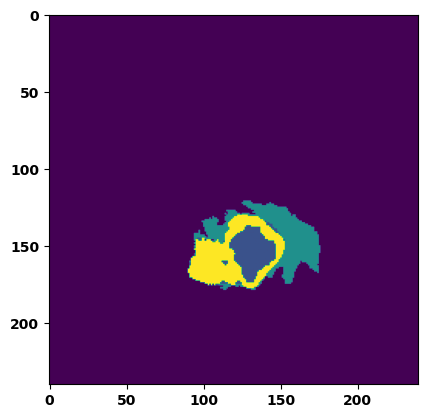

type:  HGG
index:  149 slice starts at:  92


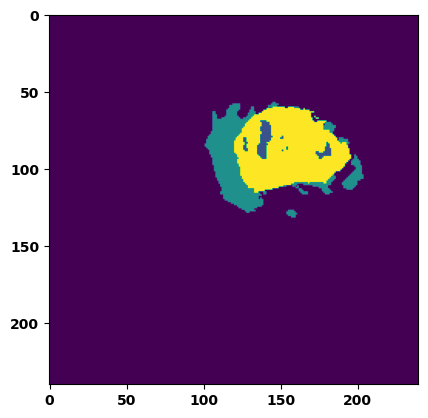

type:  HGG
index:  150 slice starts at:  59


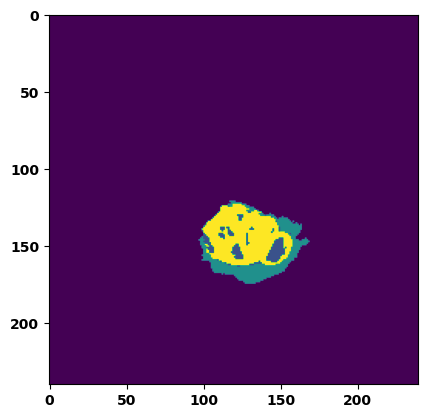

type:  HGG
index:  151 slice starts at:  68


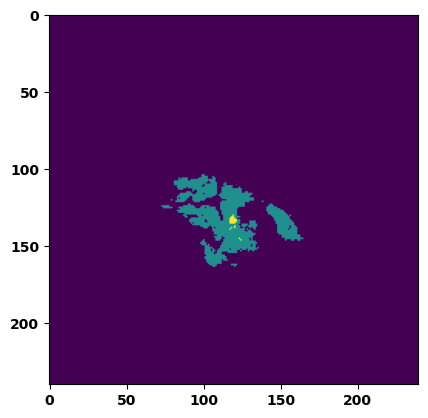

type:  HGG
index:  152 slice starts at:  62


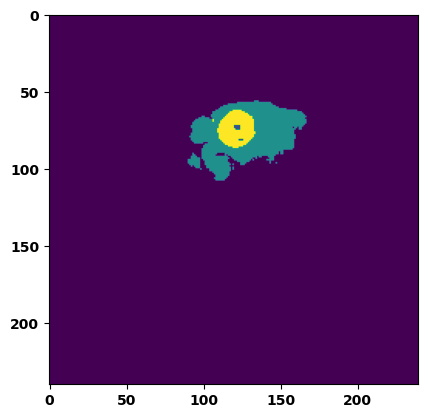

type:  HGG
index:  153 slice starts at:  101


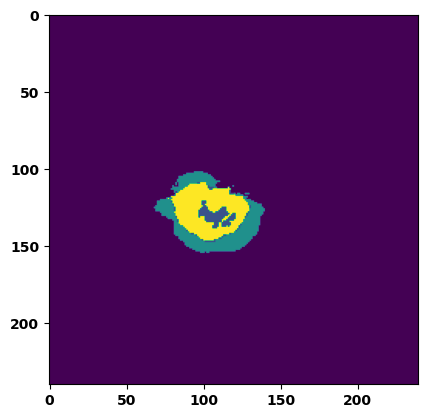

type:  HGG
index:  154 slice starts at:  100


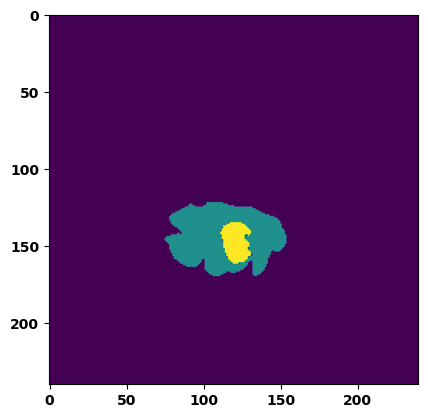

type:  HGG
index:  155 slice starts at:  90


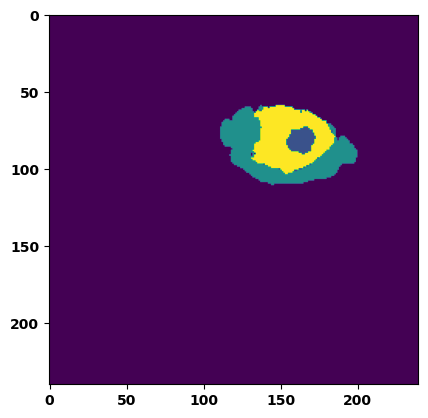

type:  HGG
index:  156 slice starts at:  62


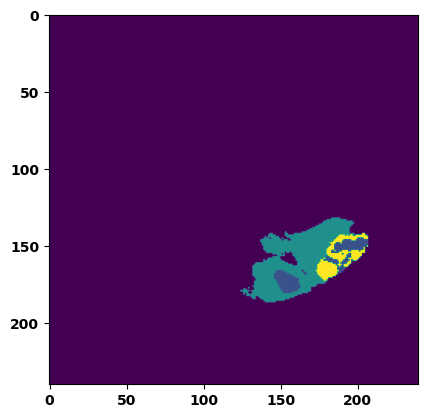

type:  HGG
index:  157 slice starts at:  88


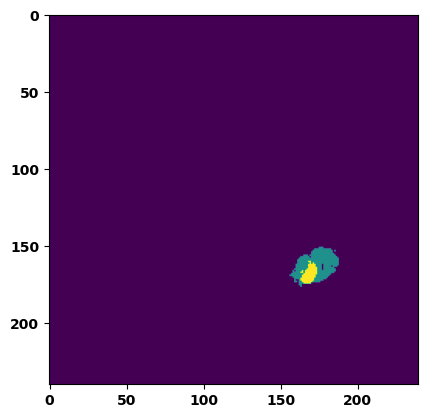

type:  HGG
index:  158 slice starts at:  63


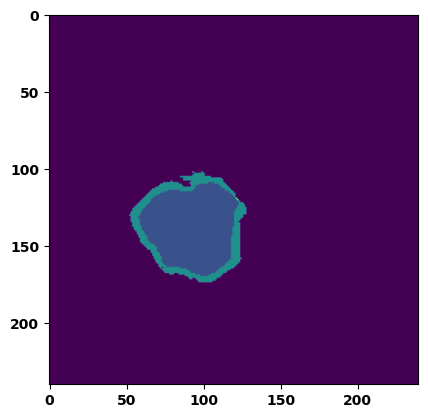

type:  HGG
index:  159 slice starts at:  93


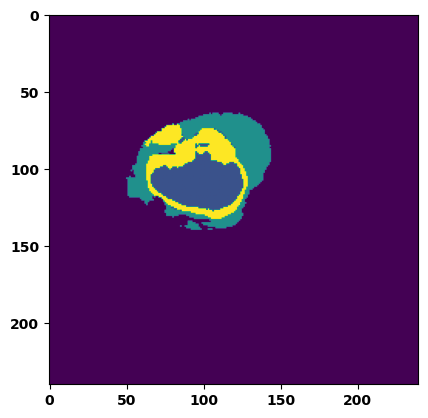

type:  HGG
index:  160 slice starts at:  52


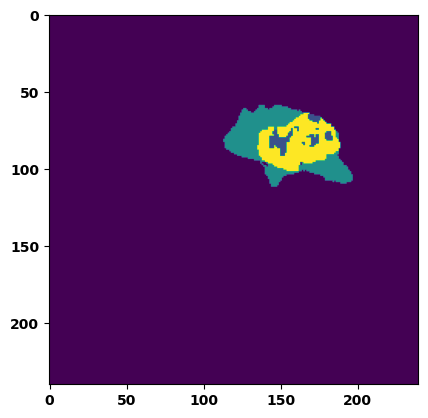

type:  HGG
index:  161 slice starts at:  73


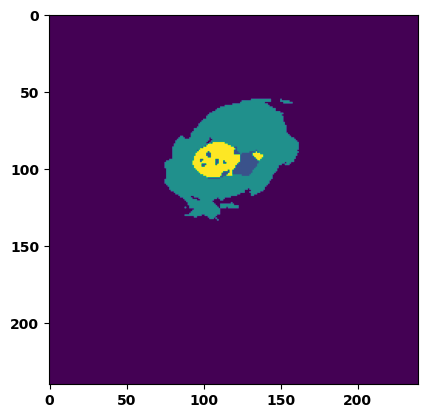

type:  HGG
index:  162 slice starts at:  65


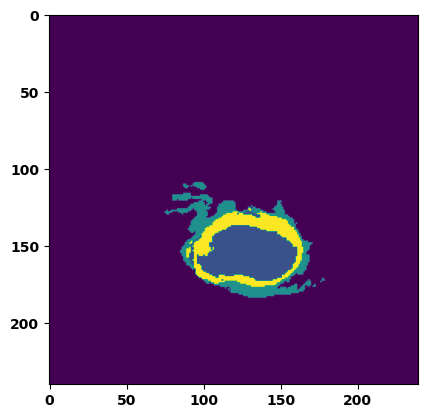

type:  HGG
index:  163 slice starts at:  102


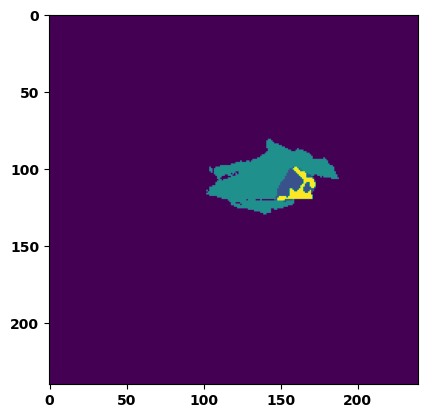

type:  HGG
index:  164 slice starts at:  71


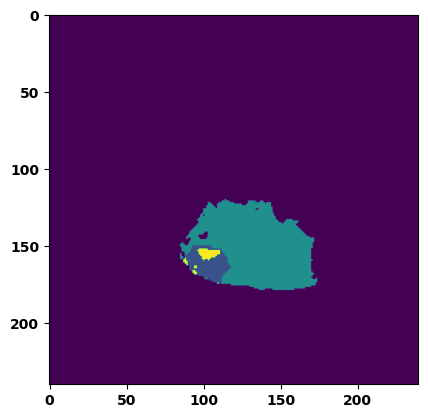

type:  HGG
index:  165 slice starts at:  92


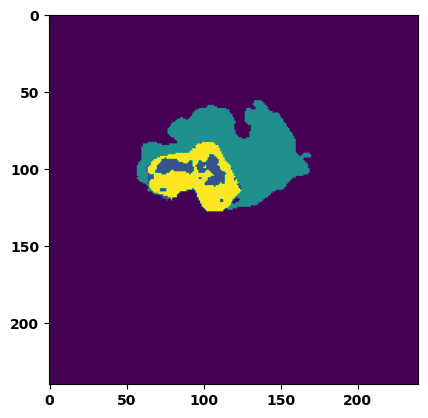

type:  HGG
index:  166 slice starts at:  48


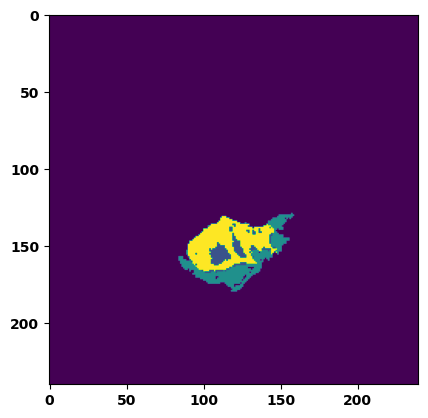

type:  HGG
index:  167 slice starts at:  62


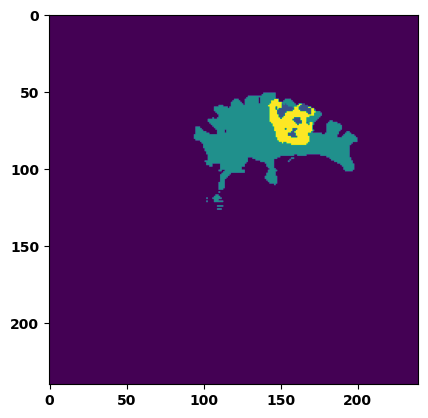

type:  HGG
index:  168 slice starts at:  71


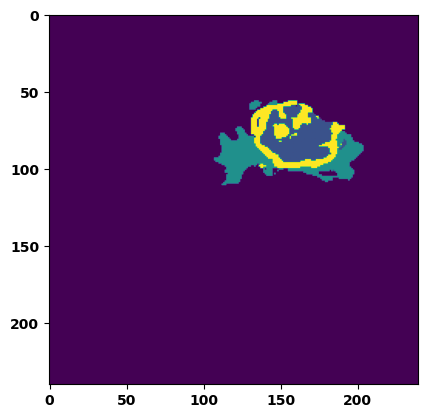

type:  HGG
index:  169 slice starts at:  61


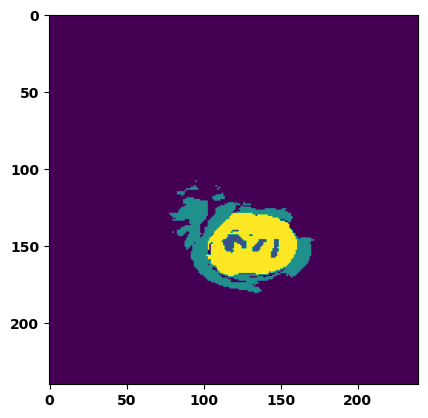

type:  HGG
index:  170 slice starts at:  64


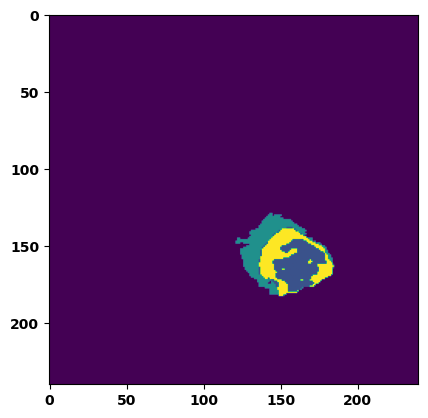

type:  HGG
index:  171 slice starts at:  70


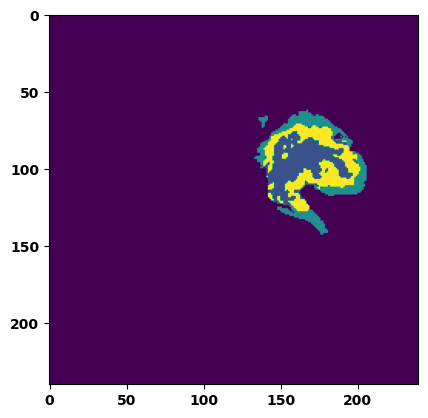

type:  HGG
index:  172 slice starts at:  90


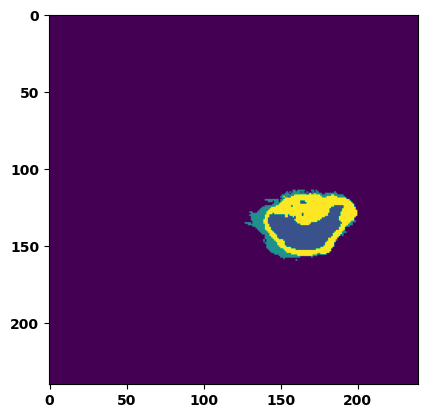

type:  HGG
index:  173 slice starts at:  51


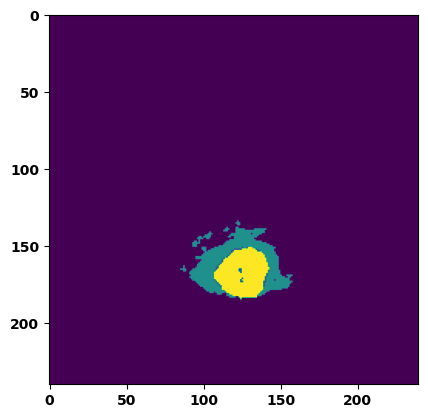

type:  HGG
index:  174 slice starts at:  52


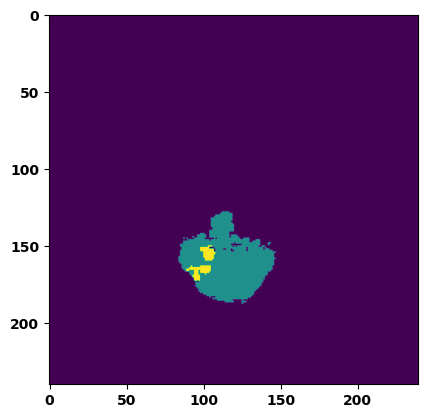

type:  HGG
index:  175 slice starts at:  86


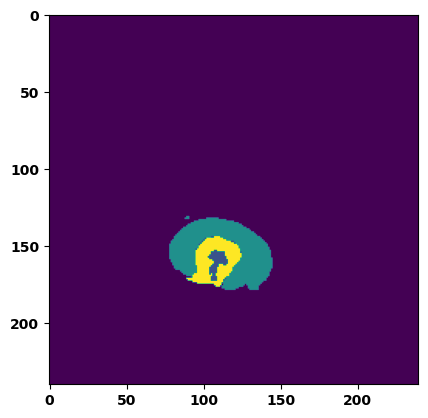

type:  HGG
index:  176 slice starts at:  78


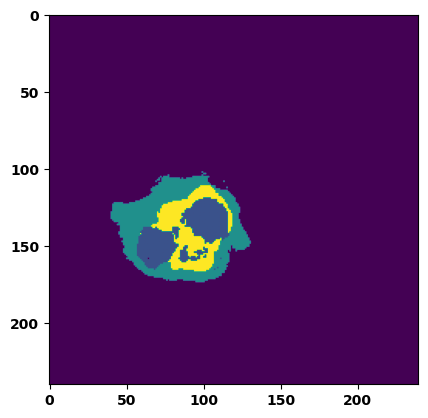

type:  HGG
index:  177 slice starts at:  60


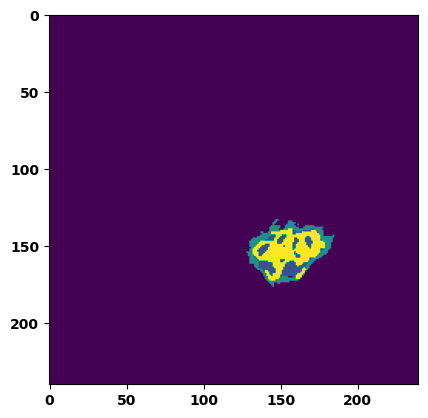

type:  HGG
index:  178 slice starts at:  91


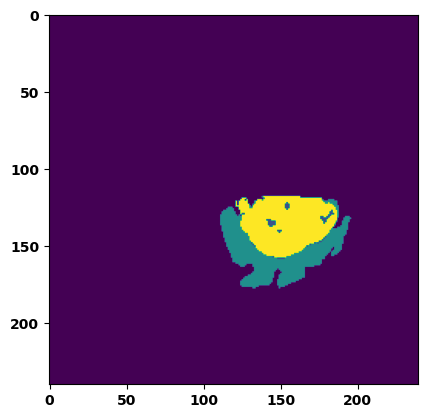

type:  HGG
index:  179 slice starts at:  66


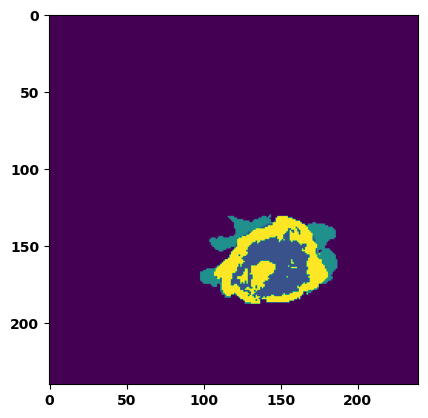

type:  HGG
index:  180 slice starts at:  78


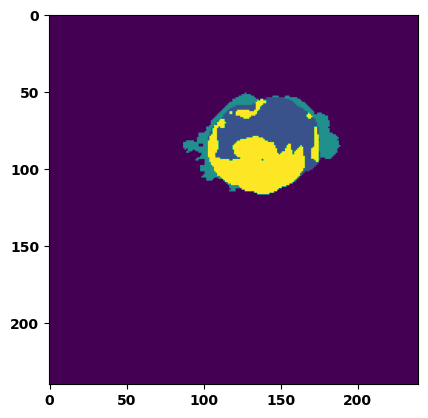

type:  HGG
index:  181 slice starts at:  82


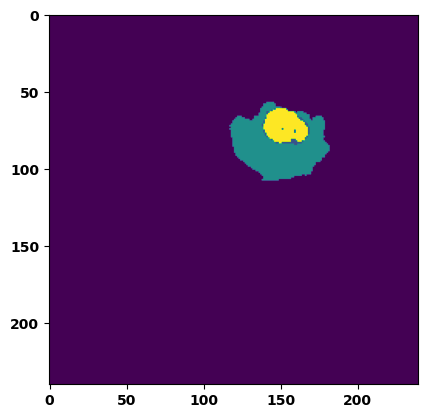

type:  HGG
index:  182 slice starts at:  80


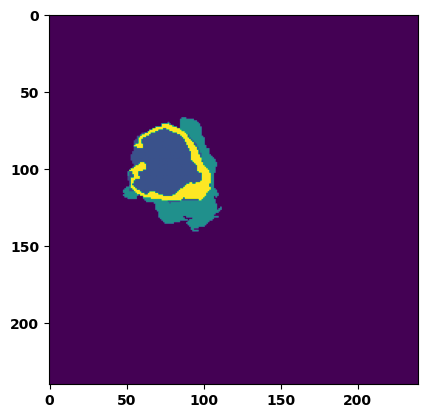

type:  HGG
index:  183 slice starts at:  96


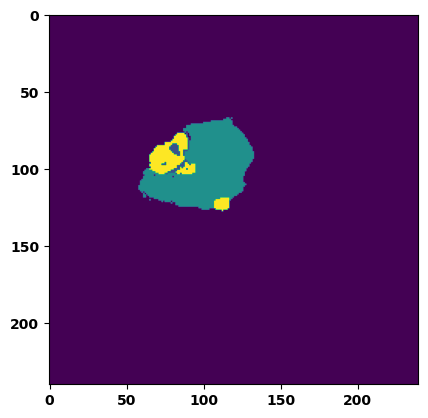

In [8]:
source = pd.read_csv(CSV_FILE)
start=[]
for i in range(len(source)):
    image_cat=source.iloc[i,0]
    image_id=source.iloc[i,1]
    mask = get_image(IMAGE_PATH,image_cat,image_id,'seg')
    index = tumor_present(mask)
    start.append(index)
    print("type: ",image_cat)
    print("index: ", i , "slice starts at: ", index)
    temp = mask[:,:,start[i]]
    figure()
    imshow(temp)
    show()
    
    

In [9]:
start = torch.Tensor(start)
torch.save(start, 'data/slice_starts.pt')

tensor([ 81.,  72., 110.,  65.,  86.,  94.,  53.,  48.,  83.,  80.,  71.,  63.,
         63.,  84.,  49.,  95.,  73.,  85.,  83.,  77.,  92.,  63., 108.,  83.,
         84.,  77.,  89.,  37.,  80.,  83.,  82.,  45.,  85.,  44., 116.,  57.,
         79.,  73.,  85.,  94.,  89.,  55., 100.,  47.,  85.,  97.,  65.,  84.,
         55.,  65., 110.,  87.,  96.,  72.,  98.,  87.,  74.,  78.,  70.,  90.,
        109.,  49.,  68.,  62.,  20.,  87.,  76.,  84.,  54.,  60.,  47., 105.,
         81.,  64.,  71.,  98.,  64.,  48., 109.,  63.,  92.,  67.,  60.,  50.,
         95.,  50.,  65.,  66.,  45.,  75.,  87.,  87.,  62.,  50.,  88.,  79.,
         68.,  87.,  44.,  78.,  45.,  93.,  63.,  59.,  45.,  88.,  80.,  45.,
         69., 110.,  54.,  64.,  66.,  94.,  96.,  62.,  63.,  80.,  52.,  98.,
         81.,  79.,  63.,  70.,  87.,  84.,  58.,  81.,  54.,  58.,  99.,  80.,
         90.,  95.,  85.,  96.,  60.,  81.,  84., 106.,  99., 102.,  73.,  86.,
         54.,  62.,  69.,  55.,  60.,  7

In [14]:
source = pd.read_csv(CSV_FILE)
startH=[]
for i in range(len(source)):
    image_cat=source.iloc[i,0]
    image_id=source.iloc[i,4]
    mask = get_image(IMAGE_PATH,image_cat,image_id,'seg')
    index = tumor_present(mask)
    startH.append(index)
    
startH = torch.Tensor(startH)
torch.save(startH, 'data/HGG_slice_starts.pt')


KeyboardInterrupt: 

In [7]:

SLICE_STARTS=torch.load('data/slice_starts.pt')


torch.Size([259])


In [8]:
h = 128
w = 144
weight=np.zeros((259,4))

In [11]:
source = pd.read_csv(CSV_FILE)
for i in range(len(source)):
    image_cat=source.iloc[i,0]
    image_id=source.iloc[i,4]
    mask = get_image(IMAGE_PATH,image_cat,image_id,'seg')
    ph=mask[50:50+h,55:55+w,SLICE_STARTS[i].int()]
    ph[ph==4]=3
    ph=torch.tensor(ph)
    for j in range(h):
        for k in range(w):
            weight[i,ph[j,k].int()]+=1
            
            
            
    print(weight[i,:])
weight=torch.tensor(weight)
torch.save(weight, 'data/weight.pt')

[16687.   183.  1281.   281.]
[16614.   116.  1457.   245.]
[18028.   193.   101.   110.]
[16853.   281.   911.   387.]
[17209.   570.   356.   297.]
[17799.    94.   256.   283.]
[16252.   318.  1481.   381.]
[16173.   534.   992.   733.]
[17400.   146.   675.   211.]
[1.7406e+04 4.3000e+01 9.7600e+02 7.0000e+00]
[17407.   417.   549.    59.]
[17493.    57.   558.   324.]
[13613.     0.  4010.   809.]
[17343.   478.   190.   421.]
[14362.   324.  2862.   884.]
[16701.   350.   148.  1233.]
[1.5956e+04 1.2000e+01 1.9830e+03 4.8100e+02]
[17374.    25.   908.   125.]
[15213.   674.  1890.   655.]
[16600.   424.   703.   705.]
[15989.   954.   475.  1014.]
[15000.    88.  3344.     0.]
[17633.     0.   598.   201.]
[15398.   852.  1323.   859.]
[16397.   200.  1338.   497.]
[17309.   518.   271.   334.]
[16827.   502.   180.   923.]
[14830.   803.  1608.  1191.]
[17253.   166.   712.   301.]
[15387.   765.  1040.  1240.]
[17361.    99.   548.   424.]
[1.7431e+04 1.0000e+01 3.7100e+02 6.20

In [20]:
HGG_Weight=torch.load('data/HGG_weight.pt')

In [25]:
weight = HGG_Weight[1]
# get weight coeff
w0=weight[0]
w1=weight[1]
w2=weight[2]
w3=weight[3]        

c0=1/w0
c1=1/w1
c2=1/w2
c3=1/w3


s = c0+c1+c2+c3
c0=c0/s
c1=c1/s
c2=c2/s
c3=c3/s

print("C0: ", c0)
print("C1: ", c1)
print("C2: ", c2)
print("C3: ", c3)

C0:  tensor(0.0045, dtype=torch.float64)
C1:  tensor(0.6410, dtype=torch.float64)
C2:  tensor(0.0510, dtype=torch.float64)
C3:  tensor(0.3035, dtype=torch.float64)
